# 📝 Crime Data Analysis

In [253]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import difflib


# ✅ Q1 – Annual Crime Trends (2001–2013)

Question:

- Compute the total number of victims per year and analyze any patterns or fluctuations in crime rates over the years (2001–2012).

Files of Use:

- 01_District_wise_crimes_committed_IPC_2001_2012.csv

- 01_District_wise_crimes_committed_IPC_2013.csv

Useful Columns:

- STATE/UT

- YEAR

- TOTAL IPC CRIMES

### 🔹 Step 1: Loading the dataset for the years 2001 to 2013

In [254]:
# Load the main IPC crimes file (2001–2012)
ipc_df_2012 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\01_District_wise_crimes_committed_IPC_2001_2012.csv")
ipc_df_2013 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\01_District_wise_crimes_committed_IPC_2013.csv")

# Merge the two dataframes
ipc_df = pd.concat([ipc_df_2012, ipc_df_2013], ignore_index=True)

# Save the merged dataframe to a CSV file
ipc_df.to_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\01_District_wise_crimes_committed_IPC_2001_2013.csv", index=False)

# Display the first few rows of the dataframe
ipc_df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


### 🔹 Step 2: Clean Column Names

In [255]:
# Normalize column names: remove whitespace, lowercase, and replace spaces
ipc_df.columns = ipc_df.columns.str.strip().str.upper().str.replace(' ', '_')

In [256]:
# Check unique values in the 'STATE_UT' column
ipc_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
     

In [257]:
# Clean STATE/UT names
ipc_df['STATE/UT'] = ipc_df['STATE/UT'].str.upper().str.strip()

# Unify common variations manually
ipc_df['STATE/UT'] = ipc_df['STATE/UT'].replace({
    'ANDHRA PRADESH': 'Andhra Pradesh',
    'ARUNACHAL PRADESH': 'Arunachal Pradesh',
    'ASSAM': 'Assam',
    'BIHAR': 'Bihar',
    'CHHATTISGARH': 'Chhattisgarh',
    'GOA': 'Goa',
    'GUJARAT': 'Gujarat',
    'HARYANA': 'Haryana',
    'HIMACHAL PRADESH': 'Himachal Pradesh',
    'JAMMU & KASHMIR': 'Jammu & Kashmir',
    'JHARKHAND': 'Jharkhand',
    'KARNATAKA': 'Karnataka',
    'KERALA': 'Kerala',
    'MADHYA PRADESH': 'Madhya Pradesh',
    'MAHARASHTRA': 'Maharashtra',
    'MANIPUR': 'Manipur',
    'MEGHALAYA': 'Meghalaya',
    'MIZORAM': 'Mizoram',
    'NAGALAND': 'Nagaland',
    'ODISHA': 'Odisha',
    'PUNJAB': 'Punjab',
    'RAJASTHAN': 'Rajasthan',
    'SIKKIM': 'Sikkim',
    'TAMIL NADU': 'Tamil Nadu',
    'TRIPURA': 'Tripura',
    'UTTAR PRADESH': 'Uttar Pradesh',
    'UTTARAKHAND': 'Uttarakhand',
    'WEST BENGAL': 'West Bengal',
    'A & N ISLANDS': 'Andaman & Nicobar Islands',
    'A&N ISLANDS': 'Andaman & Nicobar Islands',
    'CHANDIGARH': 'Chandigarh',
    'D & N HAVELI': 'Daman & Diu',
    'D&N Haveli': 'Daman & Diu',
    'DAMAN & DIU': 'Daman & Diu',
    'DELHI UT': 'Delhi',
    'LAKSHADWEEP': 'Lakshadweep',
    'PUDUCHERRY': 'Puducherry'
})


In [258]:
# Check unique values in the 'DISTRICT' column
ipc_df['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'TOTAL', 'CHANGLANG', 'DIBANG VALLEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST',
       'SIANG UPPER', 'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER',
       'TAWANG', 'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR',
       'DARRANG', 'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA',
       'GOLAGHAT', 'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON',
       'N.C.HILLS', 'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR',
    

In [259]:
# Clean DISTRICT names
ipc_df['DISTRICT'] = ipc_df['DISTRICT'].astype(str).str.strip().str.upper()

# Known alias mapping
alias_map = {
    "IMPHAL(WEST)": "IMPHAL WEST",
    "IMPHAL(EAST)": "IMPHAL EAST",
    "VIJAYAWADA CITY": "VIJAYAWADA",
    "VILUPPURAM": "VILLUPURAM",
    "KANSHIRAM NAGAR": "KASGANJ",
    "SAS NGR": "SHAHEED BHAGAT SINGH NAGAR",
    "SBS NAGAR": "SHAHEED BHAGAT SINGH NAGAR",
    "CHENNAISUBURBAN": "CHENNAI SUBURBAN",
    "JAIPUR EAST": "JAIPUR",
    "JAIPUR SOUTH": "JAIPUR",
    "JODHPUR CITY": "JODHPUR",
    "JODHPUR RURAL": "JODHPUR",
    "LUDHIANA RURAL": "LUDHIANA",
    "KOTA CITY": "KOTA",
    "KOTA RURAL": "KOTA",
    "G.R.P.": "GRP",
    "GRP": "RAILWAYS",
    "C.I.D.": "CID",
    "CID": "CID",
    "CBCID": "CID",
    "DCP BBSR": "BHUBANESWAR",
    "DCP CTC": "CUTTACK",
    "K/KUMEY": "KURUNG KUMEY"
}

# Standard district list (shortened for example, insert full cleaned list here)
standard_districts = [
"ADILABAD", "AGRA", "AHMEDABAD", "AIZAWL", "AJMER", "AKOLA", "ALIGARH", "ALMORA", "ALWAR", "AMBALA", "AMBEDKAR NAGAR", "AMRAVATI", "AMRELI", "AMRITSAR", "ANAND", "ANANTAPUR", "ANANTNAG", "ANGUL", "ANUPPUR", "ARARIA", "ARWAL", "ASHOKNAGAR", "AURAIYA", "AURANGABAD", "AZAMGARH", "BAGALKOT", "BAGESHWAR", "BALESHWAR", "BALLIA", "BALOD", "BALODABAZAR", "BALRAMPUR", "BANASKANTHA", "BANDA", "BANDIPORA", "BANGALORE", "BANGALORE RURAL", "BANKA", "BANKURA", "BANSWARA", "BARABANKI", "BARAMULLA", "BARAN", "BARDHAMAN", "BAREILLY", "BARGARH", "BARWANI", "BASTI", "BATHINDA", "BEGUSARAI", "BELAGAVI", "BELGAUM", "BEMETARA", "BENIPUR", "BERHAMPUR", "BETUL", "BHADOHI", "BHAGALPUR", "BHANDARA", "BHARATPUR", "BHARUCH", "BHAVNAGAR", "BHIWANI", "BHILWARA", "BHIND", "BHIWANI", "BHOJPUR", "BHOPAL", "BIDAR", "BIHAR SHARIF", "BIJAPUR", "BIJNOR", "BIKANER", "BILASPUR", "BIRBHUM", "BISHNUPUR", "BOKARO", "BUDAUN", "BULANDSHAHR", "BUNDI", "BURHANPUR", "BUXAR", "CHAMARAJANAGAR", "CHAMBAL", "CHAMPHAI", "CHANDAULI", "CHANDIGARH", "CHANDRAPUR", "CHHATARPUR", "CHHINDWARA", "CHIKKABALLAPUR", "CHIKMAGALUR", "CHITRADURGA", "CHITRAKOOT", "CHITTOOR", "CHURU", "COIMBATORE", "CUDDALORE", "CUTTACK", "DADRA & NAGAR HAVELI", "DAHOD", "DAKSHINA KANNADA", "DAMAN", "DANTEWADA", "DARBHANGA", "DARJEELING", "DATIA", "DAUSA", "DAVANGERE", "DEHRADUN", "DEOGHAR", "DEORIA", "DEWAS", "DHALAI", "DHANBAD", "DHAR", "DHARAMSALA", "DHARMAPURI", "DHARWAD", "DHEMAJI", "DHENKANAL", "DHOLPUR", "DHULE", "DIBRUGARH", "DIMA HASAO", "DIMAPUR", "DINDIGUL", "DINDORI", "DODA", "DUMKA", "DUNGARPUR", "DURG", "EAST CHAMPARAN", "EAST GODAVARI", "EAST KHASI HILLS", "EAST SINGHBHUM", "ERODE", "ETAH", "ETAWAH", "FAIZABAD", "FARIDABAD", "FARRUKHABAD", "FATEHABAD", "FATEHPUR", "FIROZABAD", "FIROZPUR", "GADCHIROLI", "GANDERBAL", "GANDHINAGAR", "GANGANAGAR", "GARIABAND", "GAUTAM BUDDHA NAGAR", "GAYA", "GHAZIABAD", "GHAZIPUR", "GIRIDIH", "GOALPARA", "GODDA", "GOLAGHAT", "GOMATI", "GONDA", "GOPALGANJ", "GORAKHPUR", "GULBARGA", "GUNA", "GUNTUR", "GURDASPUR", "GURGAON", "GUWAHATI", "GUWAHATI CITY", "GWALEIOR", "GWALIOR", "HAILAKANDI", "HAMIRPUR", "HANUMANGARH", "HARDOI", "HARIDWAR", "HASSAN", "HATHRAS", "HAVERI", "HISSAR", "HOOGHLY", "HOSHANGABAD", "HOSHIARPUR", "HOWRAH", "HYDERABAD", "IMPHAL EAST", "IMPHAL WEST", "INDORE", "JABALPUR", "JAGATSINGHPUR", "JAIPUR", "JAISALMER", "JAJPUR", "JALANDHAR", "JALAUN", "JALGAON", "JALNA", "JAMMU", "JAMNAGAR", "JAMSHEDPUR", "JAMSULI", "JAMUI", "JANGAON", "JANJGIR", "JASHPUR", "JAUNPUR", "JEHANABAD", "JHANSI", "JHARGRAM", "JHARSUGUDA", "JHUNJHUNU", "JIND", "JODHPUR", "JORHAT", "JUNAGADH", "KACHCHH", "KADAPA", "KAILASHAHAR", "KAIMUR", "KAITHAL", "KAKINADA", "KALAHANDI", "KALIMPONG", "KALYANI", "KAMAREDDY", "KAMRUP", "KANCHIPURAM", "KANDHAMAL", "KANGRA", "KANNAUJ", "KANPUR", "KANYAKUMARI", "KAPURTHALA", "KARAULI", "KARBI ANGLONG", "KARIMNAGAR", "KARIMGANJ", "KARNAL", "KARNATAKA", "KARUR", "KASARAGOD", "KASGANJ", "KATHUA", "KATIHAR", "KATNI", "KAUSHAMBI", "KENDRAPARA", "KENDUJHAR", "KHAGARIA", "KHAMMAM", "KHANDWA", "KHARGONE", "KHEDA", "KHORDHA", "KISHANGANJ", "KODERMA", "KOHIMA", "KOKRAJHAR", "KOLAR", "KOLASIB", "KOLHAPUR", "KOLKATA", "KOLLAM", "KOPPAL", "KORAPUT", "KORBA", "KOTA", "KOTTAYAM", "KOZHIKODE", "KRISHNA", "KRISHNAGIRI", "KULLU", "KULGAM", "KUNA", "KURNOOL", "KURUKSHETRA", "KUSHINAGAR", "KUTCH", "LAKHIMPUR", "LALITPUR", "LATEHAR", "LATUR", "LUCKNOW", "LUDHIANA", "MADHEPURA", "MADHUBANI", "MADURAI", "MAHBUBNAGAR", "MAHOBA", "MAINPURI", "MALAPPURAM", "MALDA", "MANDI", "MANDLA", "MANDSAUR", "MANDYA", "MANSA", "MATHURA", "MAU", "MAYURBHANJ", "MEDAK", "MEERUT", "MEWAT", "MIRZAPUR", "MOGA", "MOHALI", "MOKOKCHUNG", "MON", "MORADABAD", "MORENA", "MORIGAON", "MUMBAI", "MUNGER", "MURSHIDABAD", "MUZAFFARNAGAR", "MUZAFFARPUR", "MYSURU", "NADIA", "NAGAON", "NAGAPATTINAM", "NAGARKURNOOL", "NAGAUR", "NAGPUR", "NAINITAL", "NALANDA", "NALBARI", "NALGONDA", "NAMAKKAL", "NANDED", "NANDURBAR", "NARMADA", "NARSINGHPUR", "NASHIK", "NAVI MUMBAI", "NAVSARI", "NAWADA", "NAYAGARH", "NEEMUCH", "NELLORE", "NEW DELHI", "NICOBAR", "NIZAMABAD", "NOIDA", "NORTH 24 PARGANAS", "NUAPADA", "ONGOLE", "OSMANABAD", "PALAKKAD", "PALAMU", "PALGHAR", "PALI", "PALWAL", "PANCHKULA", "PANCHMAHAL", "PANIPAT", "PANNA", "PAPUM PARE", "PARBHANI", "PASHCHIM CHAMPARAN", "PASCHIM MEDINIPUR", "PATHANAMTHITTA", "PATHANKOT", "PATIALA", "PATNA", "PILIBHIT", "PITHORAGARH", "PONDICHERRY", "PORBANDAR", "PRATAPGARH", "PRAYAGRAJ", "PUDUKKOTTAI", "PULWAMA", "PUNE", "PURBA CHAMPARAN", "PURBA MEDINIPUR", "PURI", "PURNIA", "PURULIA", "RAEBARELI", "RAICHUR", "RAIGAD", "RAIGARH", "RAIPUR", "RAISEN", "RAJGARH", "RAJKOT", "RAJNANDGAON", "RAJSAMAND", "RAMANAGARA", "RAMANATHAPURAM", "RAMBAN", "RAMGARH", "RAMPUR", "RANCHI", "RANGA REDDY", "RATLAM", "RATNAGIRI", "RAYAGADA", "REWA", "REWARI", "RI BHOI", "ROHTAK", "ROHTAS", "RUDRAPRAYAG", "RUPNAGAR", "SABARKANTHA", "SAGAR", "SAHARANPUR", "SAHARSA", "SAHEBGANJ", "SAIHA", "SALEM", "SAMASTIPUR", "SAMBALPUR", "SAMBHAL", "SANGRUR", "SANT KABIR NAGAR", "SANT RAVIDAS NAGAR", "SARA", "SARAN", "SATARA", "SATNA", "SAWAI MADHOPUR", "SEHORE", "SEONI", "SHAHDOL", "SHAHJAHANPUR", "SHAJAPUR", "SHAMLI", "SHEIKHPURA", "SHEOHAR", "SHEOPUR", "SHILLONG", "SHIMLA", "SHIMOGA", "SHIVPURI", "SHOPIAN", "SHRAVASTI", "SIBSAGAR", "SIDHI", "SIDHPUR", "SIKAR", "SIKKIM", "SILCHAR", "SILIGURI", "SIMDEGA", "SINDHUDURG", "SINGRAULI", "SIRMAUR", "SIRSA", "SITAMARHI", "SITAPUR", "SIWAN", "SOLAN", "SOLAPUR", "SONBHADRA", "SONEPAT", "SONITPUR", "SOUTH 24 PARGANAS", "SRIKAKULAM", "SRINAGAR", "SULTANPUR", "SUNDARGARH", "SUPAUL", "SURAT", "SURENDRANAGAR", "SURI", "SUTLEJ", "TAMIL NADU", "TAPI", "TEHRI GARHWAL", "TENKASI", "THANE", "THANJAVUR", "THENI", "THIRUVALLUR", "THIRUVANANTHAPURAM", "THOOTHUKUDI", "THRISSUR", "TINSUKIA", "TIRAP", "TIRUCHIRAPPALLI", "TIRUNELVELI", "TIRUPATHI", "TIRUPPUR", "TIRUVANNAMALAI", "TONK", "TUENSANG", "TUMAKURU", "TURA", "UDAIPUR", "UDALGURI", "UDHAM SINGH NAGAR", "UDHAMPUR", "UDUPI", "UJJAIN", "UKHRUL", "UNA", "UNNAO", "UP", "UPPER SIANG", "UPPER SUBANSIRI", "UTTAR KANNAD", "UTTAR PRADESH", "UTTARKASHI", "VADODARA", "VAISHALI", "VALSAD", "VARANASI", "VELLORE", "VIDISHA", "VIJAYAWADA", "VILLUPURAM", "VIRUDHUNAGAR", "VISAKHAPATNAM", "VIZIANAGARAM", "WARANGAL", "WARDHA", "WASHIM", "WAYANAD", "WEST CHAMPARAN", "WEST GODAVARI", "WEST KHASI HILLS", "WEST SINGHBHUM", "WOKHA", "YADGIR", "YAMUNANAGAR", "YAVATMAL", "ZIRAKPUR"
]

# Helper: fuzzy match unknowns
def fuzzy_match(value, possibilities, cutoff=0.85):
    matches = difflib.get_close_matches(value, possibilities, n=1, cutoff=cutoff)
    return matches[0] if matches else value

# Clean function
def clean_district(value):
    if value in alias_map:
        return alias_map[value]
    elif value in standard_districts:
        return value
    else:
        return fuzzy_match(value, standard_districts)

# Apply cleaning
ipc_df['Cleaned_District'] = ipc_df['DISTRICT'].apply(clean_district)

# Drop junk DISTRICT entries
junk_districts = ['TOTAL', 'ZZ TOTAL', 'A AND N ISLANDS']
ipc_df = ipc_df[~ipc_df['Cleaned_District'].str.upper().isin([j.upper() for j in junk_districts])]

# Drop original DISTRICT
ipc_df.drop(columns=['DISTRICT'], inplace=True)

# Rename CLEANED_DISTRICT to DISTRICT (same name as before)
ipc_df.rename(columns={'Cleaned_District': 'DISTRICT'}, inplace=True)

# Move DISTRICT to second column
cols = ipc_df.columns.tolist()
cols.insert(1, cols.pop(cols.index('DISTRICT')))  # moves 'DISTRICT' to position 1
ipc_df = ipc_df[cols]

In [260]:
# Step 3: Clean column used for crime numbers
# Ensure column names are stripped of whitespace and uppercase for consistency
ipc_df.columns = ipc_df.columns.str.strip().str.upper()

# Convert 'TOTAL_IPC_CRIMES' to numeric and drop rows with NaN values in this column
ipc_df['TOTAL_IPC_CRIMES'] = pd.to_numeric(ipc_df['TOTAL_IPC_CRIMES'], errors='coerce')
ipc_df.dropna(subset=['TOTAL_IPC_CRIMES'], inplace=True)

### 🔹 Step 3: Checking Column Info and null values

In [261]:
ipc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9396 entries, 0 to 9838
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9396 non-null   object
 1   DISTRICT                                             9396 non-null   object
 2   YEAR                                                 9396 non-null   int64 
 3   MURDER                                               9396 non-null   int64 
 4   ATTEMPT_TO_MURDER                                    9396 non-null   int64 
 5   CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER            9396 non-null   int64 
 6   RAPE                                                 9396 non-null   int64 
 7   CUSTODIAL_RAPE                                       9396 non-null   int64 
 8   OTHER_RAPE                                           9396 non-null   int64 
 9   KI

In [262]:
# Preview columns to identify crime columns
ipc_df.columns.tolist()

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'ATTEMPT_TO_MURDER',
 'CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER',
 'RAPE',
 'CUSTODIAL_RAPE',
 'OTHER_RAPE',
 'KIDNAPPING_&_ABDUCTION',
 'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS',
 'KIDNAPPING_AND_ABDUCTION_OF_OTHERS',
 'DACOITY',
 'PREPARATION_AND_ASSEMBLY_FOR_DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'AUTO_THEFT',
 'OTHER_THEFT',
 'RIOTS',
 'CRIMINAL_BREACH_OF_TRUST',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS_HURT',
 'DOWRY_DEATHS',
 'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY',
 'INSULT_TO_MODESTY_OF_WOMEN',
 'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES',
 'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES',
 'CAUSING_DEATH_BY_NEGLIGENCE',
 'OTHER_IPC_CRIMES',
 'TOTAL_IPC_CRIMES']

In [263]:
# Get the count of each unique value in the State/UT column
state_counts = ipc_df['STATE/UT'].value_counts()

# Print the count of each unique value
state_counts.head(10)

STATE/UT
Uttar Pradesh     942
Madhya Pradesh    670
Maharashtra       585
Bihar             572
Tamil Nadu        496
Rajasthan         485
Odisha            454
Karnataka         422
Gujarat           406
Andhra Pradesh    391
Name: count, dtype: int64

In [264]:
ipc_df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_&_ABDUCTION,...,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
0,Andhra Pradesh,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,Andhra Pradesh,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,Andhra Pradesh,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,Andhra Pradesh,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,Andhra Pradesh,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


### 🔹 Step 4: Group by Year

In [265]:
# Group by YEAR to get total crimes per year
yearly_trend = ipc_df.groupby('YEAR')['TOTAL_IPC_CRIMES'].sum().reset_index()
yearly_trend

,YEAR,TOTAL_IPC_CRIMES
0,2001,1823692
1,2002,1829467
2,2003,1763524
3,2004,1885633
4,2005,1878667
5,2006,1936256
6,2007,2044931
7,2008,2142729
8,2009,2171596
9,2010,2276123


### 🔹 Step 5: Visualization

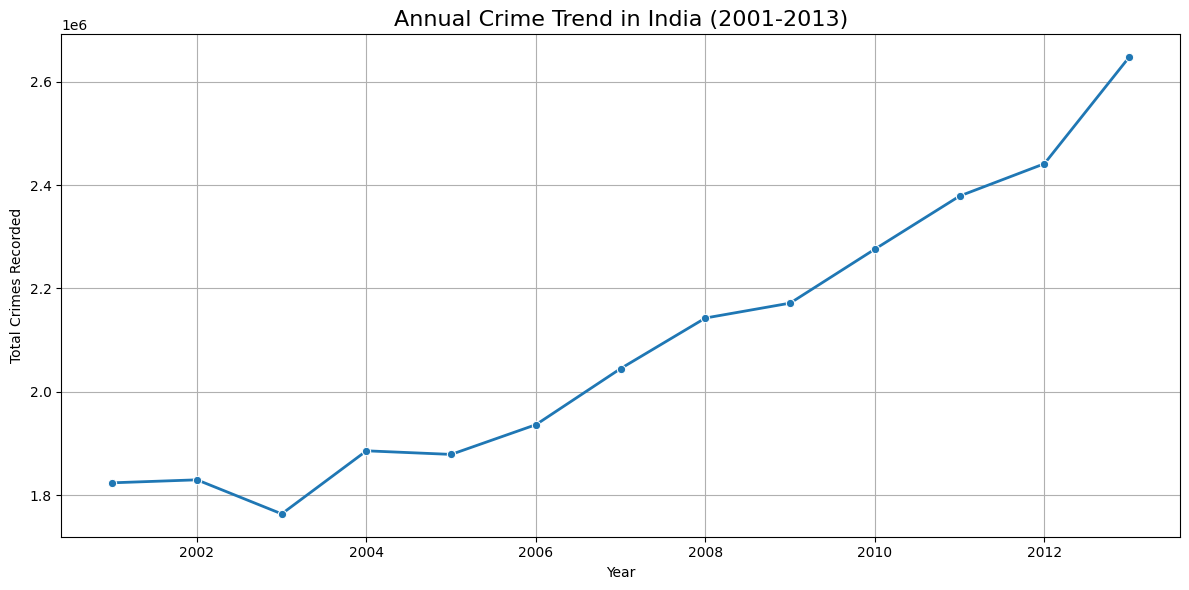

In [266]:
# Plotting the annual crime trend
plt.figure(figsize=(12, 6))     # Set figure size

sns.lineplot(data=yearly_trend, x='YEAR', y='TOTAL_IPC_CRIMES', marker='o', linewidth=2)    # Line plot with markers
plt.title('Annual Crime Trend in India (2001-2013)', fontsize=16)   # Title of the plot
plt.xlabel('Year')  # Set x-axis label
plt.ylabel('Total Crimes Recorded') # Set y-axis label
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()  # Display the plot

### 🔍 Observation

- The graph highlights the trend of total crime victims recorded in India from 2001 to 2012.

- Trend: Crime numbers increased steadily from 2001 to 2011, with a slight dip in 2004 and 2008.

- There appears to be a steady increase in crime over the years, which may be influenced by population growth, improved crime reporting, or socio-political changes.

- Spike: A significant spike can be observed in 2011–2012, which could be explored further in later questions.

# ✅ Q2: State-Wise Crime Analysis (2001–2013)

Question:
- Perform a comprehensive analysis of various crimes recorded in each state over the given period. Identify trends, anomalies, and patterns.

Objectives: 
- Analyze various crimes recorded in each state across the years 2001 to 2012. 
- Identify:
    - Trends over time per state
    - High-crime and low-crime states
    - Any anomalies or unexpected changes

Files of Use:
- 01_District_wise_crimes_committed_IPC_2001_2012.csv
- 01_District_wise_crimes_committed_IPC_2013.csv

Useful Columns
- STATE/UT
- YEAR
- TOTAL IPC CRIMES

### 🔹 Step 1: Group by State and Year

In [267]:
# Group data to get total crimes per state per year
state_yearly_crimes = ipc_df.groupby(['STATE/UT', 'YEAR'])['TOTAL_IPC_CRIMES'].sum().reset_index()

### 🔹 Step 2: Create Pivot Table
This helps visualize crime trends across states over years.

In [268]:
# Normalize state names
state_yearly_crimes['STATE/UT'] = state_yearly_crimes['STATE/UT'].str.strip().str.upper()  # or use .str.title() if you prefer that

# Now re-create the pivot table
crime_pivot = state_yearly_crimes.pivot_table(index='STATE/UT', columns='YEAR', values='TOTAL_IPC_CRIMES', aggfunc='sum')


In [269]:
# Fill NaN values with 0 for better visualization
crime_pivot = crime_pivot.fillna(0)

### 🔹 Step 3: Visualization – Heatmap of Crimes Across States

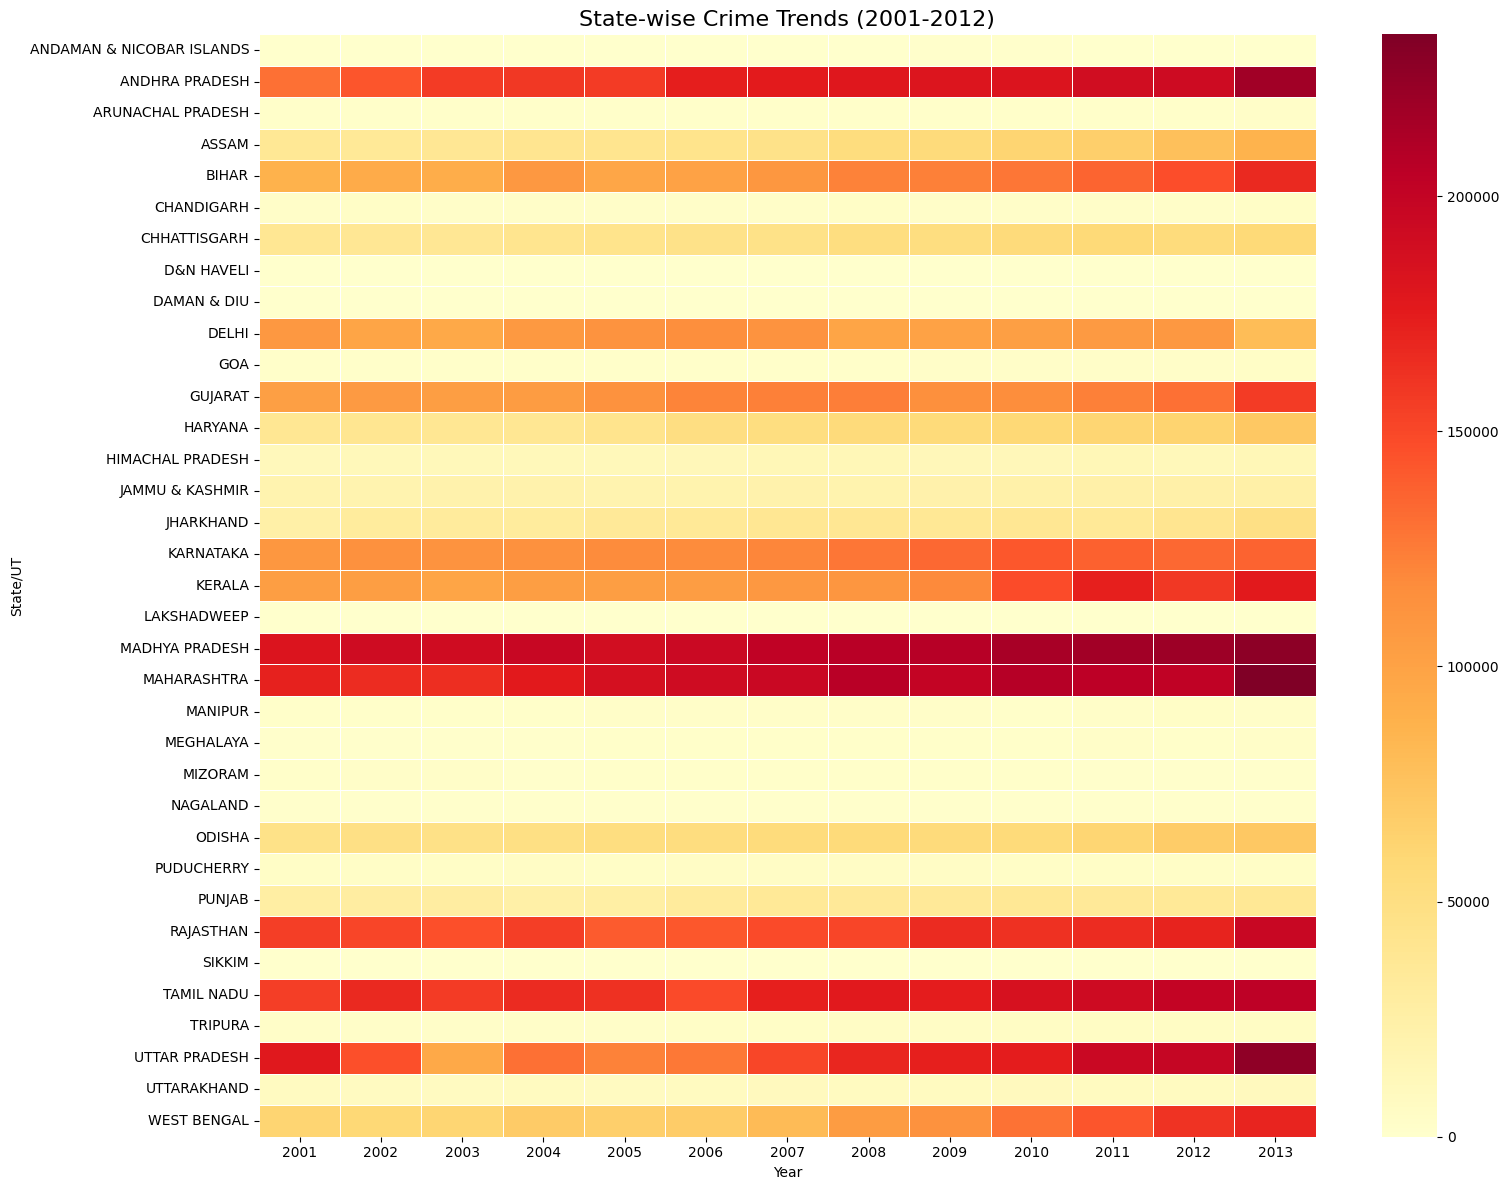

In [270]:
# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(crime_pivot, cmap='YlOrRd', linewidths=0.5)

# Add color bar and labels
plt.title("State-wise Crime Trends (2001-2012)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()

### 🔍 Observation

- The state shows a steady increase in crime from 2001 to 2008.

- There may be a sharp spike around 2010 - 2012 — this could be due to changes in crime recording or law enforcement activity.

- High crime states - Maharashtra, Madhya Pradesh, Uttar Pradesh, and Andhra Pradesh consistently show the highest total IPC crimes.

- Moderate crime - States like Tamil Nadu, Karnataka, Bihar, and Gujarat show steady increases over time.

- Low crime zones - UTs and smaller northeastern states (e.g., Lakshadweep, Mizoram, Daman & Diu) report minimal crime.

- Overall trend - Most states show a gradual rise in crimes year over year.

## ✅ Q3: City-Wise Crime Distribution (2001–2012)

Question:
- For each state, identify the top six cities with the highest recorded crime incidents.

Files of Use:
- 01_District_wise_crimes_committed_IPC_2001_2012.csv

- 01_District_wise_crimes_committed_IPC_2013.csv

- This file contains district-wise IPC crimes which can be aggregated to state level over time.


Useful Columns:

- STATE/UT

- DISTRICT (or similar, may be named differently — verify in your CSV)

- TOTAL IPC CRIMES

- YEAR (optional — aggregate over all years if needed)

### 🔹Step 1: Aggregate and Rank
We’ll group and rank districts (cities) within each state:


In [271]:
# Group by STATE/UT and DISTRICT, summing the Total IPC Crimes
state_district_grouped = (
    ipc_df.groupby(['STATE/UT', 'DISTRICT'])['TOTAL_IPC_CRIMES']
    .sum()
    .reset_index()
)

# For each State/UT, get the top 6 districts
top6_districts_per_state = (
    state_district_grouped
    .sort_values(['STATE/UT', 'TOTAL_IPC_CRIMES'], ascending=[True, False])
    .groupby('STATE/UT', group_keys=False)
    .head(6)
)

# Display the result
top6_districts_per_state.head(10)  # Display first 20 rows for brevity

,STATE/UT,DISTRICT,TOTAL_IPC_CRIMES
0,Andaman & Nicobar Islands,ANDAMAN,7377
4,Andaman & Nicobar Islands,SOUTH,976
3,Andaman & Nicobar Islands,NORTH,271
2,Andaman & Nicobar Islands,NICOBAR,235
1,Andaman & Nicobar Islands,CAR,48
14,Andhra Pradesh,HYDERABAD CITY,219286
9,Andhra Pradesh,CYBERABAD,161735
15,Andhra Pradesh,KARIMNAGAR,105564
12,Andhra Pradesh,GUNTUR,104117
10,Andhra Pradesh,EAST GODAVARI,99972


### 🔹Step 2: Visualization: Top 6 Cities per State

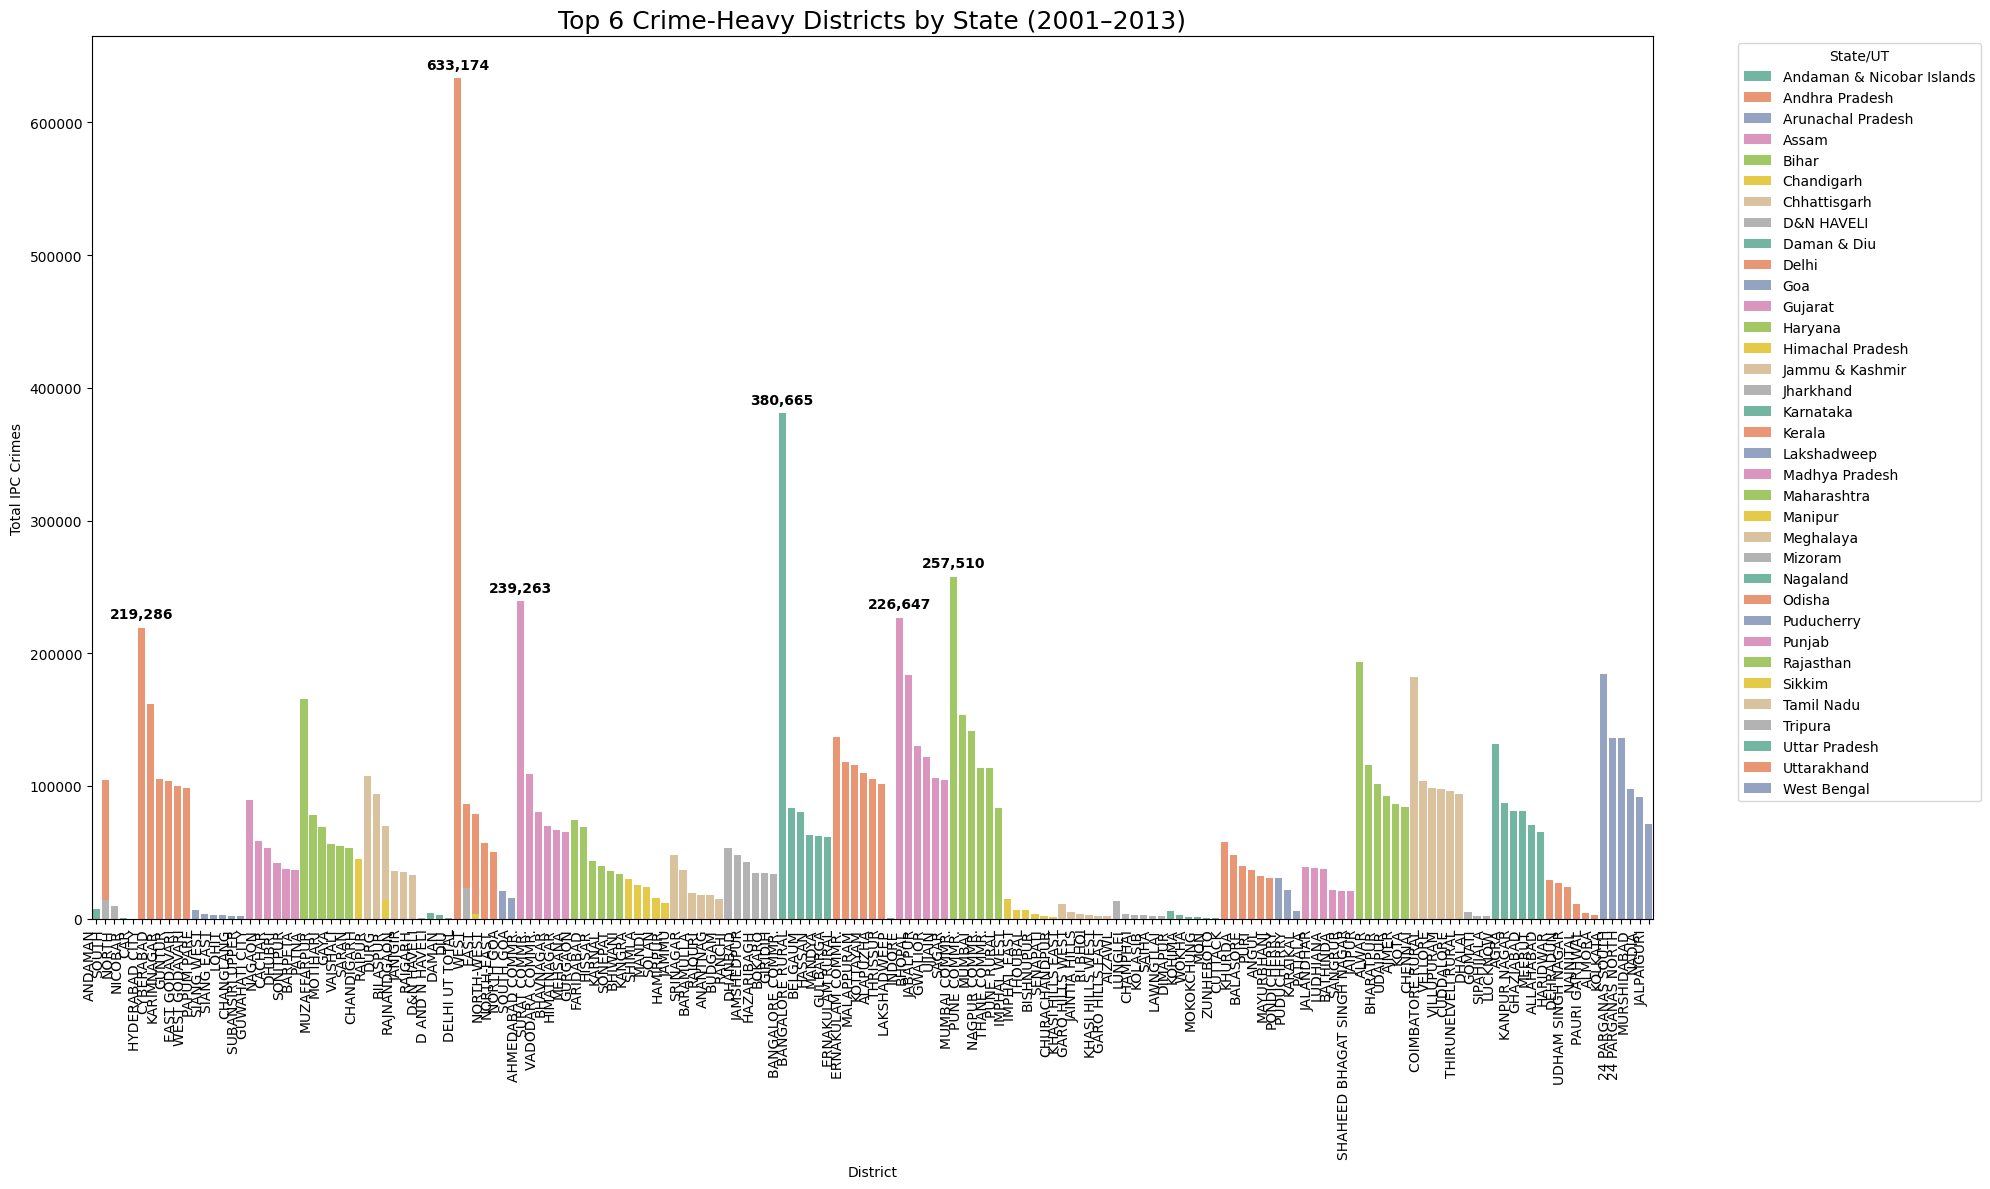

In [272]:
# Get top 6 districts by Total IPC Crimes
top6_districts = (
    top6_districts_per_state.groupby('DISTRICT')['TOTAL_IPC_CRIMES'].sum()
    .sort_values(ascending=False)
    .head(6)
    .index.tolist()
)

# Create the plot
plt.figure(figsize=(20, 12))
ax = sns.barplot(
    data=top6_districts_per_state,
    x='DISTRICT',
    y='TOTAL_IPC_CRIMES',
    hue='STATE/UT',
    dodge=False,
    palette='Set2'
)

# Rotate labels and clean up axes
plt.xticks(rotation=90, ha='right')
plt.xlabel('District')
plt.ylabel('Total IPC Crimes')
plt.title('Top 6 Crime-Heavy Districts by State (2001–2013)', fontsize=18)

# Add text labels on top of bars for top 6 districts only
for p in ax.patches:
    district = p.get_x() + p.get_width() / 2
    value = int(p.get_height())
    label = p.get_label() if hasattr(p, 'get_label') else ''

    if p.get_x() + p.get_width() / 2:  # safe guard

        # Extract the district name
        district_name = p.get_x() + p.get_width() / 2
        x_tick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
        idx = int(p.get_x() + p.get_width() / 2)
        
        try:
            label_name = x_tick_labels[int(p.get_x() + p.get_width() / 2)]
        except:
            continue

        if label_name in top6_districts:
            ax.text(
                p.get_x() + p.get_width() / 2,
                p.get_height() + 5000,  # position slightly above the bar
                f'{value:,}',
                ha='center',
                va='bottom',
                fontsize=10,
                color='black',
                fontweight='bold'
            )

# Simplify legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='State/UT', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 🔍 Observations:
Urban Dominance:

- In most states, urban districts (e.g., **Hyderabad City**, **Mumbai**, **Delhi**, **Bengaluru**, etc.) consistently top the charts. This is expected due to higher population density, economic activity, and reporting mechanisms.

State Capitals & Major Cities:

- State capitals or economically important cities often feature among the top districts — reflecting either actual crime prevalence or better reporting systems.

Population-Crime Correlation:

- There's a visible correlation between population and crime numbers — densely populated districts tend to report more IPC crimes.

Smaller States/UTs:

- In Union Territories or smaller states like **Andaman & Nicobar**, **Puducherry**, or **Sikkim**, total IPC crimes are significantly lower, and fewer districts contribute to the count.

Criminal Hotspots:

- Some districts, like **Delhi**, **Mumbai**, **Patna**, and **Lucknow**, report exceptionally high numbers, indicating either criminal concentration or better data tracking.

Reporting Bias:

- The data might also reflect reporting infrastructure and awareness, rather than just crime prevalence — underreporting in rural or remote districts is a known issue.

## ✅ Q4: Highest Crime Rate States

Question:
- Determine the top five states with the highest crime rates across all crime categories.

Files of Use:
- 01_District_wise_crimes_committed_IPC_2001_2012.csv

- 01_District_wise_crimes_committed_IPC_2013.csv


Useful Columns:

- STATE/UT

- TOTAL IPC CRIMES


### 🔹Step 1: Checking data structure

In [273]:
ipc_df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_&_ABDUCTION,...,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
0,Andhra Pradesh,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,Andhra Pradesh,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,Andhra Pradesh,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,Andhra Pradesh,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,Andhra Pradesh,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [274]:
ipc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9396 entries, 0 to 9838
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9396 non-null   object
 1   DISTRICT                                             9396 non-null   object
 2   YEAR                                                 9396 non-null   int64 
 3   MURDER                                               9396 non-null   int64 
 4   ATTEMPT_TO_MURDER                                    9396 non-null   int64 
 5   CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER            9396 non-null   int64 
 6   RAPE                                                 9396 non-null   int64 
 7   CUSTODIAL_RAPE                                       9396 non-null   int64 
 8   OTHER_RAPE                                           9396 non-null   int64 
 9   KI

### 🔹Step 2: Group by State and Sum IPC Crimes

In [275]:
# Group total IPC crimes by STATE/UT
total_crimes_by_state = (
    ipc_df.groupby('STATE/UT')['TOTAL_IPC_CRIMES']
    .sum()
    .reset_index()
)

### 🔹Step 3: Sort Values by Total Crimes

In [276]:
# Sort by total crimes descending
total_crimes_by_state = total_crimes_by_state.sort_values(
    by='TOTAL_IPC_CRIMES', ascending=False
)

In [277]:
# Select top 5 states
top_5_states = total_crimes_by_state.head(5)
top_5_states

,STATE/UT,TOTAL_IPC_CRIMES
19,Madhya Pradesh,2641223
20,Maharashtra,2507821
30,Tamil Nadu,2263755
1,Andhra Pradesh,2236996
32,Uttar Pradesh,2084519


### 🔹Step 4: Plot the Bar Graph

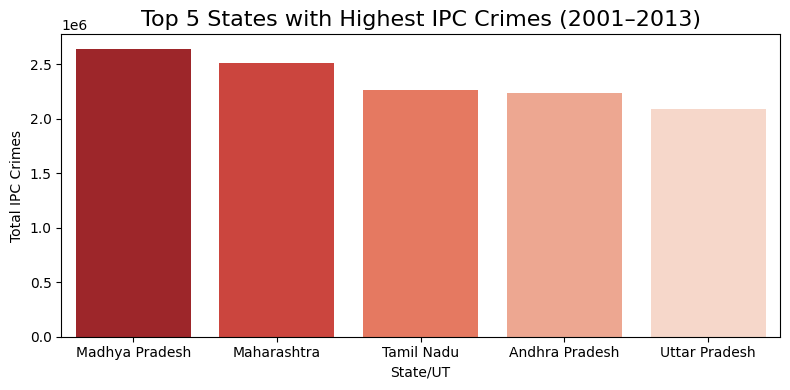

In [278]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=top_5_states,
    x='STATE/UT',
    y='TOTAL_IPC_CRIMES',
    palette='Reds_r',
    hue='STATE/UT',
)

plt.title('Top 5 States with Highest IPC Crimes (2001–2013)', fontsize=16)
plt.xlabel('State/UT')
plt.ylabel('Total IPC Crimes')
plt.tight_layout()
plt.show()

### 🔍 Observations:
- **Uttar Pradesh**, **Maharashtra**, and **Bihar** consistently top the list with the highest number of reported IPC crimes from 2001 to 2013. 
- This suggests either a higher crime prevalence, better reporting, or both in these states.

# ✅ Q5: Crimes Against Women

Question:
- Identify the top five cities with the highest number of crimes committed against women.

Files of Use:
- 42_District_wise_crimes_committed_against_women_*.csv

Useful Columns:

- STATE/UT

- DISTRICT

- YEAR

- RAPE

- DOWRY DEATH

- ASSAULT, etc.

### 🔹Step 1: Load and Clean the Data

Loading and Cleaning Data for the year 2014

In [279]:
df_42_2014 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\42_District_wise_crimes_committed_against_women_2014.csv")
df_42_2014.columns.tolist()

['States/UTs',
 'District',
 'Year',
 'Rape',
 'Custodial Rape',
 'Custodial_Gang Rape',
 'Custodial_Other Rape',
 'Rape other than Custodial',
 'Rape_Gang Rape',
 'Rape_Others',
 'Attempt to commit Rape',
 'Kidnapping & Abduction_Total',
 'Kidnaping & Abduction',
 'Kidnaping & Abduction in order to Murder',
 'Kidnapping for Ransom',
 'Kidnapping & Abduction of Women to compel her for marriage',
 'Kidnaping & Abduction_Others',
 'Dowry Deaths',
 'Assault on Women with intent to outrage her Modesty_Total',
 'Sexual Harassment',
 'Assault on women with intent to Disrobe',
 'Voyeurism',
 'Stalking',
 'Others',
 'Insult to the Modesty of Women_Total',
 'At Office premises',
 'In places related to work',
 'In Public Transport system',
 'In other Places',
 'Cruelty by Husband or his Relatives',
 'Importation of Girls from Foreign Country',
 'Murder',
 'Attempt to commit Murder',
 'Culpable Homicide not amounting to Murder',
 'Attempt to commit Culpable Homicide',
 'Grievous Hurt',
 'Hurt',
 

In [280]:
# Define the columns to keep
columns_to_keep = [
    'States/UTs',
    'District',
    'Year',
    'Custodial Rape',
    'Custodial_Gang Rape',
    'Custodial_Other Rape',
    'Rape other than Custodial',
    'Rape_Gang Rape',
    'Rape_Others',
    'Attempt to commit Rape',
    'Kidnapping & Abduction_Total',
    'Dowry Deaths',
    'Assault on Women with intent to outrage her Modesty_Total',
    'Insult to the Modesty of Women_Total',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls from Foreign Country',
    'Total Crimes against Women'
]

# Filter the dataframe to keep only the desired columns
updated_df_42_2014 = df_42_2014[columns_to_keep]

# Display the first few rows to confirm
updated_df_42_2014.head()

,States/UTs,District,Year,Custodial Rape,Custodial_Gang Rape,Custodial_Other Rape,Rape other than Custodial,Rape_Gang Rape,Rape_Others,Attempt to commit Rape,Kidnapping & Abduction_Total,Dowry Deaths,Assault on Women with intent to outrage her Modesty_Total,Insult to the Modesty of Women_Total,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Total Crimes against Women
0,Andhra Pradesh,Anantapur,2014,0,0,0,35,0,35,1,106,25,436,26,165,0,1097
1,Andhra Pradesh,Chittoor,2014,0,0,0,32,1,31,0,34,17,135,94,278,0,607
2,Andhra Pradesh,Cuddapah,2014,0,0,0,28,0,28,4,16,16,215,12,91,0,609
3,Andhra Pradesh,East Godavari,2014,0,0,0,85,0,85,18,25,7,519,62,464,0,1277
4,Andhra Pradesh,Guntakal Railway,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [281]:
# Define relevant columns to sum
rape_cols = [
    'Custodial Rape',
    'Custodial_Gang Rape',
    'Custodial_Other Rape',
    'Rape other than Custodial',
    'Rape_Gang Rape',
    'Rape_Others',
    'Attempt to commit Rape',
]

# Create new column by summing across the selected columns
updated_df_42_2014['Rape'] = updated_df_42_2014[rape_cols].sum(axis=1)

# Move DISTRICT to second column
cols = updated_df_42_2014.columns.tolist()
cols.insert(3, cols.pop(cols.index('Rape')))  # moves 'DISTRICT' to position 1
updated_df_42_2014 = updated_df_42_2014[cols]

# Drop all the rape columns
updated_df_42_2014.drop(columns=[
    'Custodial Rape',
    'Custodial_Gang Rape',
    'Custodial_Other Rape',
    'Rape other than Custodial',
    'Rape_Gang Rape',
    'Rape_Others',
    'Attempt to commit Rape',
], inplace=True)

# Preview the updated dataset
updated_df_42_2014.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_12420\76304526.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_42_2014['Rape'] = updated_df_42_2014[rape_cols].sum(axis=1)


,States/UTs,District,Year,Rape,Kidnapping & Abduction_Total,Dowry Deaths,Assault on Women with intent to outrage her Modesty_Total,Insult to the Modesty of Women_Total,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Total Crimes against Women
0,Andhra Pradesh,Anantapur,2014,71,106,25,436,26,165,0,1097
1,Andhra Pradesh,Chittoor,2014,64,34,17,135,94,278,0,607
2,Andhra Pradesh,Cuddapah,2014,60,16,16,215,12,91,0,609
3,Andhra Pradesh,East Godavari,2014,188,25,7,519,62,464,0,1277
4,Andhra Pradesh,Guntakal Railway,2014,0,0,0,0,0,0,0,4


In [282]:
# Rename columns for consistency and readability
updated_df_42_2014.rename(columns={
    'States/UTs': 'STATE/UT',
    'District': 'DISTRICT',
    'Kidnapping & Abduction_Total': 'Kidnapping and Abduction',
    'Assault on Women with intent to outrage her Modesty_Total': 'Assault on women with intent to outrage her modesty',
    'Insult to the Modesty of Women_Total': 'Insult to modesty of Women',
    'Importation of Girls from Foreign Country': 'Importation of Girls'
}, inplace=True)

# Show updated columns
updated_df_42_2014.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes against Women
0,Andhra Pradesh,Anantapur,2014,71,106,25,436,26,165,0,1097
1,Andhra Pradesh,Chittoor,2014,64,34,17,135,94,278,0,607
2,Andhra Pradesh,Cuddapah,2014,60,16,16,215,12,91,0,609
3,Andhra Pradesh,East Godavari,2014,188,25,7,519,62,464,0,1277
4,Andhra Pradesh,Guntakal Railway,2014,0,0,0,0,0,0,0,4


Loading and Cleaning Data for the year 2001 - 2012

In [283]:
df_42_2001_2012 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\42_District_wise_crimes_committed_against_women_2001_2012.csv")
df_42_2001_2012.columns.tolist()

['STATE/UT',
 'DISTRICT',
 'Year',
 'Rape',
 'Kidnapping and Abduction',
 'Dowry Deaths',
 'Assault on women with intent to outrage her modesty',
 'Insult to modesty of Women',
 'Cruelty by Husband or his Relatives',
 'Importation of Girls']

In [284]:
# Define relevant columns to sum
crime_cols = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls'
]

# Create new column by summing across the selected columns
df_42_2001_2012['Total Crimes against Women'] = df_42_2001_2012[crime_cols].sum(axis=1)

# Preview the updated dataset
df_42_2001_2012.head()


,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes against Women
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,475


Loading and Cleaning Data for the year 2013

In [285]:
df_42_2013 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\42_District_wise_crimes_committed_against_women_2013.csv")
df_42_2013.columns.tolist()

['STATE/UT',
 'DISTRICT',
 'Year',
 'Rape',
 'Kidnapping and Abduction',
 'Dowry Deaths',
 'Assault on women with intent to outrage her modesty',
 'Insult to modesty of Women',
 'Cruelty by Husband or his Relatives',
 'Importation of Girls']

In [286]:
# Define relevant columns to sum
crime_cols = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls'
]

# Create new column by summing across the selected columns
df_42_2013['Total Crimes against Women'] = df_42_2013[crime_cols].sum(axis=1)

# Preview the updated dataset
df_42_2013.head()


,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes against Women
0,Andhra Pradesh,ADILABAD,2013,61,47,12,197,138,464,0,919
1,Andhra Pradesh,ANANTAPUR,2013,28,84,23,337,43,161,0,676
2,Andhra Pradesh,CHITTOOR,2013,31,27,13,119,84,435,0,709
3,Andhra Pradesh,CUDDAPAH,2013,19,50,9,318,163,207,0,766
4,Andhra Pradesh,CYBERABAD,2013,138,129,43,350,338,1526,0,2524


Merging the datasets of the years 2001-2012, 2013 and 2014 into one dataframe

In [287]:
# Merge dataframes
crime_against_women_district = pd.concat([df_42_2001_2012, df_42_2013, updated_df_42_2014], ignore_index=True)

crime_against_women_district.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes against Women
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,475


### 🔹Step 2: Cleaning and Preparing data

In [288]:
# Clean DISTRICT names
crime_against_women_district['DISTRICT'] = crime_against_women_district['DISTRICT'].astype(str).str.strip().str.upper()

# Known alias mapping for districts
district_alias_map = {
    "IMPHAL(WEST)": "IMPHAL WEST",
    "IMPHAL(EAST)": "IMPHAL EAST",
    "VIJAYAWADA CITY": "VIJAYAWADA",
    "VILUPPURAM": "VILLUPURAM",
    "KANSHIRAM NAGAR": "KASGANJ",
    "SAS NGR": "SHAHEED BHAGAT SINGH NAGAR",
    "SBS NAGAR": "SHAHEED BHAGAT SINGH NAGAR",
    "CHENNAISUBURBAN": "CHENNAI SUBURBAN",
    "JAIPUR EAST": "JAIPUR",
    "JAIPUR SOUTH": "JAIPUR",
    "JODHPUR CITY": "JODHPUR",
    "JODHPUR RURAL": "JODHPUR",
    "LUDHIANA RURAL": "LUDHIANA",
    "KOTA CITY": "KOTA",
    "KOTA RURAL": "KOTA",
    "G.R.P.": "GRP",
    "GRP": "RAILWAYS",
    "C.I.D.": "CID",
    "CBCID": "CID",
    "DCP BBSR": "BHUBANESWAR",
    "DCP CTC": "CUTTACK",
    "K/KUMEY": "KURUNG KUMEY"
}

# Standardize district and state names
crime_against_women_district['DISTRICT'] = crime_against_women_district['DISTRICT'].replace(district_alias_map)

# Clean STATE/UT names (adding this based on your description of merging D&N Haveli and Daman & Diu)
state_alias_map = {
    "D&N HAVELI": "DADRA & NAGAR HAVELI AND DAMAN & DIU",
    "D & N HAVELI": "DADRA & NAGAR HAVELI AND DAMAN & DIU",
    "DAMAN & DIU": "DADRA & NAGAR HAVELI AND DAMAN & DIU",
    "A & N ISLANDS": "ANDAMAN & NICOBAR ISLANDS",
    "A&N ISLANDS": "ANDAMAN & NICOBAR ISLANDS",
    "DELHI": "DELHI",
    "DELHI UT": "DELHI"
}

crime_against_women_district['STATE/UT'] = crime_against_women_district['STATE/UT'].str.upper().replace(state_alias_map)

# Drop junk DISTRICT entries
junk_districts = ['TOTAL', 'ZZ TOTAL', 'A AND N ISLANDS', 'Total', 'Zz Total', 'ZZ', 'Others']
crime_against_women_district = crime_against_women_district[~crime_against_women_district['DISTRICT'].isin(junk_districts)]

# Ensure 'DISTRICT' column is in the desired position (second column)
# Move 'DISTRICT' to the second position
cols = list(crime_against_women_district.columns)
cols.insert(1, cols.pop(cols.index('DISTRICT')))
crime_against_women_district = crime_against_women_district[cols]


# List to filter out special units or non-standard areas, ensuring case insensitivity
filter_out = ['Stf', 'Eow', 'Railways', 'Vigilance', 'Cyber Cell', 'Central Investigation Department', 'CID', 'Spl Cell', 'Crime Branch']
filter_out = [item.upper() for item in filter_out]  # Convert everything to uppercase for case-insensitive comparison

# Filter out entries
crime_against_women_district = crime_against_women_district[
    ~crime_against_women_district['DISTRICT'].str.upper().isin(filter_out)
]

# Use regular expressions to remove prefixes like 'Crime ' or 'Railways '
crime_against_women_district['DISTRICT'] = crime_against_women_district['DISTRICT'].replace(
    regex=[r'^(Crime|Railways)\s+'], value='')

# Check DataFrame structure
crime_against_women_district.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes against Women
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,475


In [289]:
# Check for any remaining junk values in DISTRICT
# Standardize text for matching
crime_against_women_district['DISTRICT'] = crime_against_women_district['DISTRICT'].str.strip().str.title()
crime_against_women_district['STATE/UT'] = crime_against_women_district['STATE/UT'].str.strip().str.title()

# Filter out rows with 'Total' or 'Zz' in DISTRICT (case-insensitive)
crime_against_women_district = crime_against_women_district[
    ~crime_against_women_district['DISTRICT'].str.lower().str.contains('total|zz')
]

# Define women-related crime columns
women_crimes_cols = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls',
]

# Calculate total crimes against women
crime_against_women_district['Total Crimes against Women'] = crime_against_women_district[women_crimes_cols].sum(axis=1)


### 🔹Step 3: Get Top 5 Cities with Highest Crimes Against Women


In [290]:
# Group by district + state and sum crimes
grouped_women_crimes = crime_against_women_district.groupby(['STATE/UT', 'DISTRICT'])['Total Crimes against Women'].sum().reset_index()

# Sort and get top 5
top_5_districts = grouped_women_crimes.sort_values(by='Total Crimes against Women', ascending=False).head(5)

top_5_districts

,STATE/UT,DISTRICT,Total Crimes against Women
943,West Bengal,Murshidabad,34737
914,West Bengal,24 Parganas South,27942
913,West Bengal,24 Parganas North,26815
944,West Bengal,Nadia,23137
17,Andhra Pradesh,Hyderabad City,21672


### 🔹Step 4: Plotting the graph

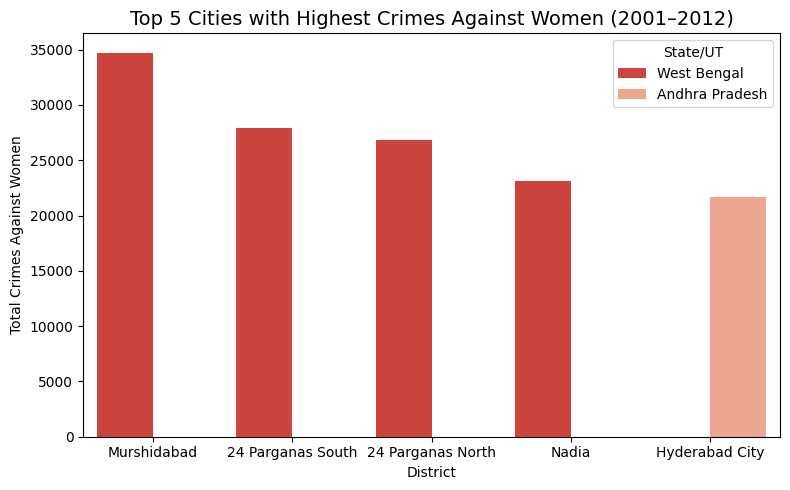

In [291]:
# Plotting the top 5 districts
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=top_5_districts,
    x='DISTRICT',
    y='Total Crimes against Women',
    hue='STATE/UT',
    palette='Reds_r',
    dodge=True,
)

# Fix rotated labels
plt.title('Top 5 Cities with Highest Crimes Against Women (2001–2012)', fontsize=14)
plt.xlabel('District')
plt.ylabel('Total Crimes Against Women')
plt.legend(title='State/UT')
plt.tight_layout()
plt.show()


### 🔍 Observation:

- **Murshidabad (West Bengal)** ranks highest in total crimes against women, indicating a pressing need for focused intervention.

- **24 Parganas (North & South)** and **Nadia—all** from West Bengal—suggest a regional pattern where certain districts show consistently high crime rates against women.

- **Hyderabad City (Andhra Pradesh)** is the only urban district in the top 5, pointing to both urban vulnerabilities and possibly better reporting systems.

- 📌 **West Bengal** dominates the top 5, highlighting potential regional socio-economic or systemic factors influencing women's safety.

# ✅ Q6: Reasons Behind Violent Crimes

Question:
- Using the dataset, analyze the primary reasons associated with incidents of kidnapping and murder.

Files of Use:
- 19_Motive_or_cause_of_murder_and_culpable_homicide_not_amounting_to_murder.csv

- 39_Specific_purpose_of_kidnapping_and_abduction.csv

Useful Columns:

🔹 murder_df_19:

- Area_Name

- Year

- Columns starting with: Murder_Cause_ (e.g., Murder_Cause_Property_Dispute, Murder_Cause_Gain, etc.)

🔹 kidnap_df_39:

- Area_Name

- Group_Name

- Sub_Group_Name

- Year

- Relevant columns: 

    - Group_Name

    - Sub_Group_Name

    - K_A_Cases_Reported

### 🔹 Step 1: Load Datasets

Murder Data

In [292]:
murder_df_19 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\19_Motive_or_cause_of_murder_and_culpable_homicide_not_amounting_to_murder.csv")
murder_df_19.head()

,Area_Name,Year,CHNAMurder_Cause_By_TerroristExtremist,CHNAMurder_Cause_Casteism,CHNAMurder_Cause_Class_Conflict,CHNAMurder_Cause_Communalism,CHNAMurder_Cause_Dowry,CHNAMurder_Cause_For_Political_reason,CHNAMurder_Cause_Gain,CHNAMurder_Cause_Love_AffairsSexual_Relations,...,Murder_Cause_Dowry,Murder_Cause_For_Political_reason,Murder_Cause_Gain,Murder_Cause_Love_AffairsSexual_Relations,Murder_Cause_Lunacy,Murder_Cause_Other_Causes_or_Motives,Murder_Cause_Personal_Vendetta_or_Enmity,Murder_Cause_Property_Dispute,Murder_Cause_Total,Murder_Cause_Witchcraft
0,Odisha,2007,0,11,0,0,2,0,0,0,...,138,4,60,61,1,755,113,43,1210,28
1,Jharkhand,2002,0,3,2,2,13,3,7,9,...,70,25,103,158,3,599,242,228,1488,26
2,Jharkhand,2004,0,3,2,2,13,3,7,9,...,70,25,103,158,3,599,242,228,1488,26
3,Bihar,2010,0,2,2,0,11,0,47,35,...,168,24,352,187,5,1228,441,916,3362,2
4,Karnataka,2002,0,1,0,0,0,0,0,1,...,52,6,55,130,0,1093,188,98,1627,0


In [293]:
# Drop the total column from murder dataset
murder_df_19_updated = murder_df_19.drop(columns=['Murder_Cause_Total', 'CHNAMurder_Cause_Total'], errors='ignore')

In [294]:
murder_df_19_updated.head()

,Area_Name,Year,CHNAMurder_Cause_By_TerroristExtremist,CHNAMurder_Cause_Casteism,CHNAMurder_Cause_Class_Conflict,CHNAMurder_Cause_Communalism,CHNAMurder_Cause_Dowry,CHNAMurder_Cause_For_Political_reason,CHNAMurder_Cause_Gain,CHNAMurder_Cause_Love_AffairsSexual_Relations,...,Murder_Cause_Communalism,Murder_Cause_Dowry,Murder_Cause_For_Political_reason,Murder_Cause_Gain,Murder_Cause_Love_AffairsSexual_Relations,Murder_Cause_Lunacy,Murder_Cause_Other_Causes_or_Motives,Murder_Cause_Personal_Vendetta_or_Enmity,Murder_Cause_Property_Dispute,Murder_Cause_Witchcraft
0,Odisha,2007,0,11,0,0,2,0,0,0,...,0,138,4,60,61,1,755,113,43,28
1,Jharkhand,2002,0,3,2,2,13,3,7,9,...,0,70,25,103,158,3,599,242,228,26
2,Jharkhand,2004,0,3,2,2,13,3,7,9,...,0,70,25,103,158,3,599,242,228,26
3,Bihar,2010,0,2,2,0,11,0,47,35,...,0,168,24,352,187,5,1228,441,916,2
4,Karnataka,2002,0,1,0,0,0,0,0,1,...,4,52,6,55,130,0,1093,188,98,0


Kidnap Data

In [295]:
kidnap_df_39 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\39_Specific_purpose_of_kidnapping_and_abduction.csv")
kidnap_df_39.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
# Drop the total columns from kidnapping dataset
columns_to_drop = ['K_A_Male_Total', 'K_A_Grand_Total', 'K_A_Female_Total', '14. Total (Sum of 1-13 Above)']
kidnap_df_39_updated = kidnap_df_39.drop(columns=columns_to_drop, errors='ignore')

In [297]:
kidnap_df_39_updated.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Upto_10_Years,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Upto_10_Years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,3.0,0.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 🔹 Step 2: Murder Analysis

In [298]:
# Select only murder cause columns (exclude Total)
murder_cause_cols = [col for col in murder_df_19_updated.columns if col.startswith('Murder_Cause_') and col != 'Murder_Cause_Total']

# Sum cases by reason
murder_reasons_sum = murder_df_19_updated[murder_cause_cols].sum().sort_values(ascending=False)

# Clean column names for display (remove prefix)
murder_reasons_sum.index = murder_reasons_sum.index.str.replace('Murder_Cause_', '').str.replace('_', ' ').str.title()

# Top 5 reasons
top_5_murder_reasons = murder_reasons_sum.head(5)

C:\Users\hp\AppData\Local\Temp\ipykernel_12420\381683656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


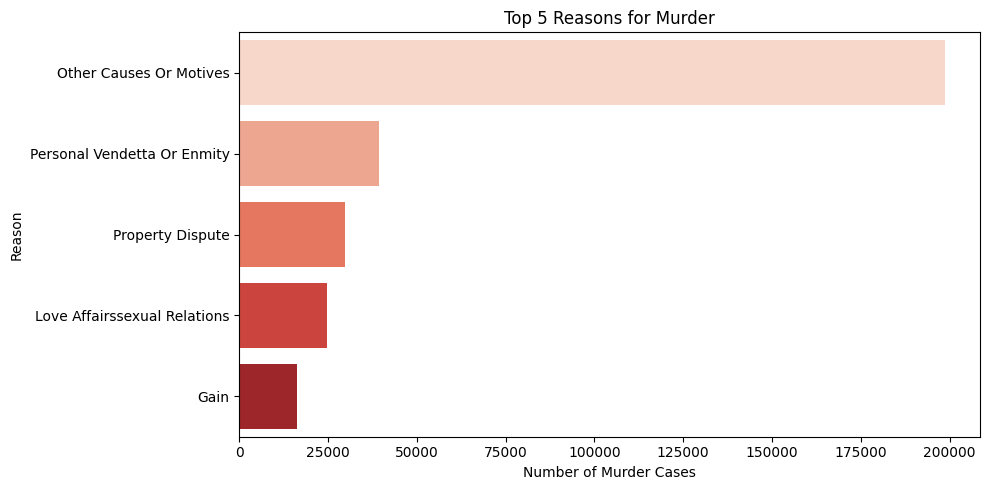

In [299]:
# Plot top 5 murder reasons
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_5_murder_reasons.values,
    y=top_5_murder_reasons.index,
    palette='Reds'
)
plt.title('Top 5 Reasons for Murder')
plt.xlabel('Number of Murder Cases')
plt.ylabel('Reason')
plt.tight_layout()
plt.show()

### 🔹 Step 3: Kidnapping Reasons Analysis

In [300]:
# Group and sum reported cases by reason
kidnap_reason_summary = (
    kidnap_df_39_updated.groupby('Sub_Group_Name')['K_A_Cases_Reported']
    .sum()
    .sort_values(ascending=False)
)

# Remove numeric prefixes in reason names (like "01. For Marriage")
kidnap_reason_summary.index = kidnap_reason_summary.index.str.replace(r'^\d+\.\s*', '', regex=True)

# Drop "Total" category if present
kidnap_reason_summary = kidnap_reason_summary[~kidnap_reason_summary.index.str.contains("Total", case=False)]

# Get top 5 reasons
top_5_kidnap_reasons = kidnap_reason_summary.head(5)
top_5_kidnap_reasons

Sub_Group_Name
For Marriage               118995.0
Other Purposes              95847.0
For Illicit Intercourse     23541.0
For Ransom                   8817.0
For Unlawful Activity        6125.0
Name: K_A_Cases_Reported, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_12420\1728283293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


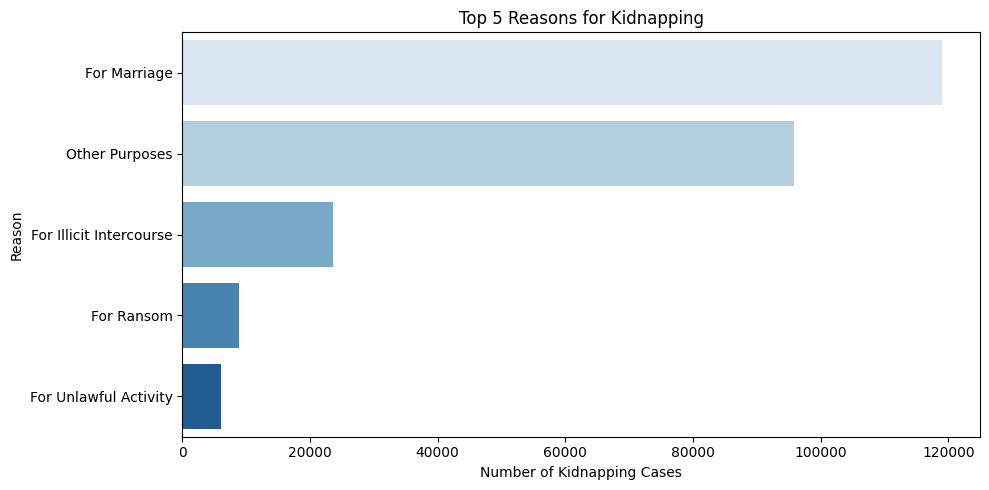

In [301]:
# Plot top 5 kidnapping reasons
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_5_kidnap_reasons.values,
    y=top_5_kidnap_reasons.index,
    palette='Blues'
)
plt.title('Top 5 Reasons for Kidnapping')
plt.xlabel('Number of Kidnapping Cases')
plt.ylabel('Reason')
plt.tight_layout()
plt.show()

### 🔍 Observation:

- Kidnapping:

    - The most common reason for kidnapping is **"Marriage"**, followed by **"Illicit Intercourse"** and **"Ransom"**.

    - This reflects deep-rooted socio-cultural issues, such as forced/child marriages and exploitation.

     - The presence of large numbers under “Other Purposes” hints at vague reporting or underlying unclassified motives.

- Murder:

     - **Personal Vendetta** or **Enmity** and **Property Disputes** are among the top reasons for murders.

     - Other common causes include Dowry, Gain (like Robbery or Inheritance), and Love affairs.

     - These trends show that personal and financial conflicts are primary drivers of violent crimes.

- Insight: 
    - Most violent crimes stem from personal, societal, and domestic tensions rather than organized or ideological crimes.
    - This suggests the need for stronger conflict resolution, community awareness, and women protection programs.

# ✅ Q7: Crime Pair Analysis

Question:
- Identify the top ten pairs of crimes where one crime tends to lead to another (e.g., kidnapping leading to murder, custodial torture leading to custodial death, rape leading to murder, etc.).

Files of Use:

Merge IPC files ipc_df

- 01_District_wise_crimes_committed_IPC_2001_2012.csv

- 01_District_wise_crimes_committed_IPC_2013.csv

Useful Columns:

- Murder

- Attempt to Murder

- Rape

- Custodial Rape

- Kidnapping & Abduction

- Dowry Deaths

- Assault on women with intent to outrage her modesty

- Cruelty by husband or his relatives

- Causing death by negligence

- Hurt/Grevious Hurt

- Insult to modesty of Women

### 🔹Step 1: Data cleaning for ipc_df 

In [302]:
ipc_df.drop( ["OTHER_IPC_CRIMES", "TOTAL_IPC_CRIMES"], axis=1, inplace=True)

In [303]:
ipc_df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_&_ABDUCTION,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE
0,Andhra Pradesh,ADILABAD,2001,101,60,17,50,0,50,46,...,104,1,30,1131,16,149,34,175,0,181
1,Andhra Pradesh,ANANTAPUR,2001,151,125,1,23,0,23,53,...,65,8,69,1543,7,118,24,154,0,270
2,Andhra Pradesh,CHITTOOR,2001,101,57,2,27,0,27,59,...,209,9,38,2088,14,112,83,186,0,404
3,Andhra Pradesh,CUDDAPAH,2001,80,53,1,20,0,20,25,...,37,2,23,795,17,126,38,57,0,233
4,Andhra Pradesh,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,220,3,41,1244,12,109,58,247,0,431


### 🔹Step 2: Corelation Analysis

In [304]:
# Step 1: Select crime columns (assuming first 3 columns are non-crime)
crime_columns = ipc_df.columns[3:]

# Step 2: Sum total crimes for each column and select the top 10
crime_sums = ipc_df[crime_columns].sum()
top_10_crime_names = crime_sums.sort_values(ascending=False).head(10).index

# Step 3: Create a correlation matrix for only these top 10 crime columns
corr_top10 = ipc_df[top_10_crime_names].corr()
corr_top10

,THEFT,HURT/GREVIOUS_HURT,OTHER_THEFT,AUTO_THEFT,BURGLARY,CAUSING_DEATH_BY_NEGLIGENCE,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,CHEATING,RIOTS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY
THEFT,1.000000,0.416998,0.947156,0.943741,0.784690,0.381914,0.445889,0.756210,0.184526,0.480328
HURT/GREVIOUS_HURT,0.416998,1.000000,0.471518,0.314617,0.594946,0.499271,0.470334,0.521180,0.362929,0.634641
OTHER_THEFT,0.947156,0.471518,1.000000,0.787795,0.794682,0.393551,0.445050,0.739621,0.212082,0.487087
AUTO_THEFT,0.943741,0.314617,0.787795,1.000000,0.687496,0.327626,0.397379,0.689573,0.135685,0.420170
BURGLARY,0.784690,0.594946,0.794682,0.687496,1.000000,0.470372,0.368561,0.677151,0.299184,0.563640
CAUSING_DEATH_BY_NEGLIGENCE,0.381914,0.499271,0.393551,0.327626,0.470372,1.000000,0.388838,0.444040,0.180771,0.398376
CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,0.445889,0.470334,0.445050,0.397379,0.368561,0.388838,1.000000,0.521740,0.384126,0.523878
CHEATING,0.756210,0.521180,0.739621,0.689573,0.677151,0.444040,0.521740,1.000000,0.249105,0.467243
RIOTS,0.184526,0.362929,0.212082,0.135685,0.299184,0.180771,0.384126,0.249105,1.000000,0.325398
ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,0.480328,0.634641,0.487087,0.420170,0.563640,0.398376,0.523878,0.467243,0.325398,1.000000


### 🔹Step 3: Visualizations

*Correlation Heatmap from ipc_df*

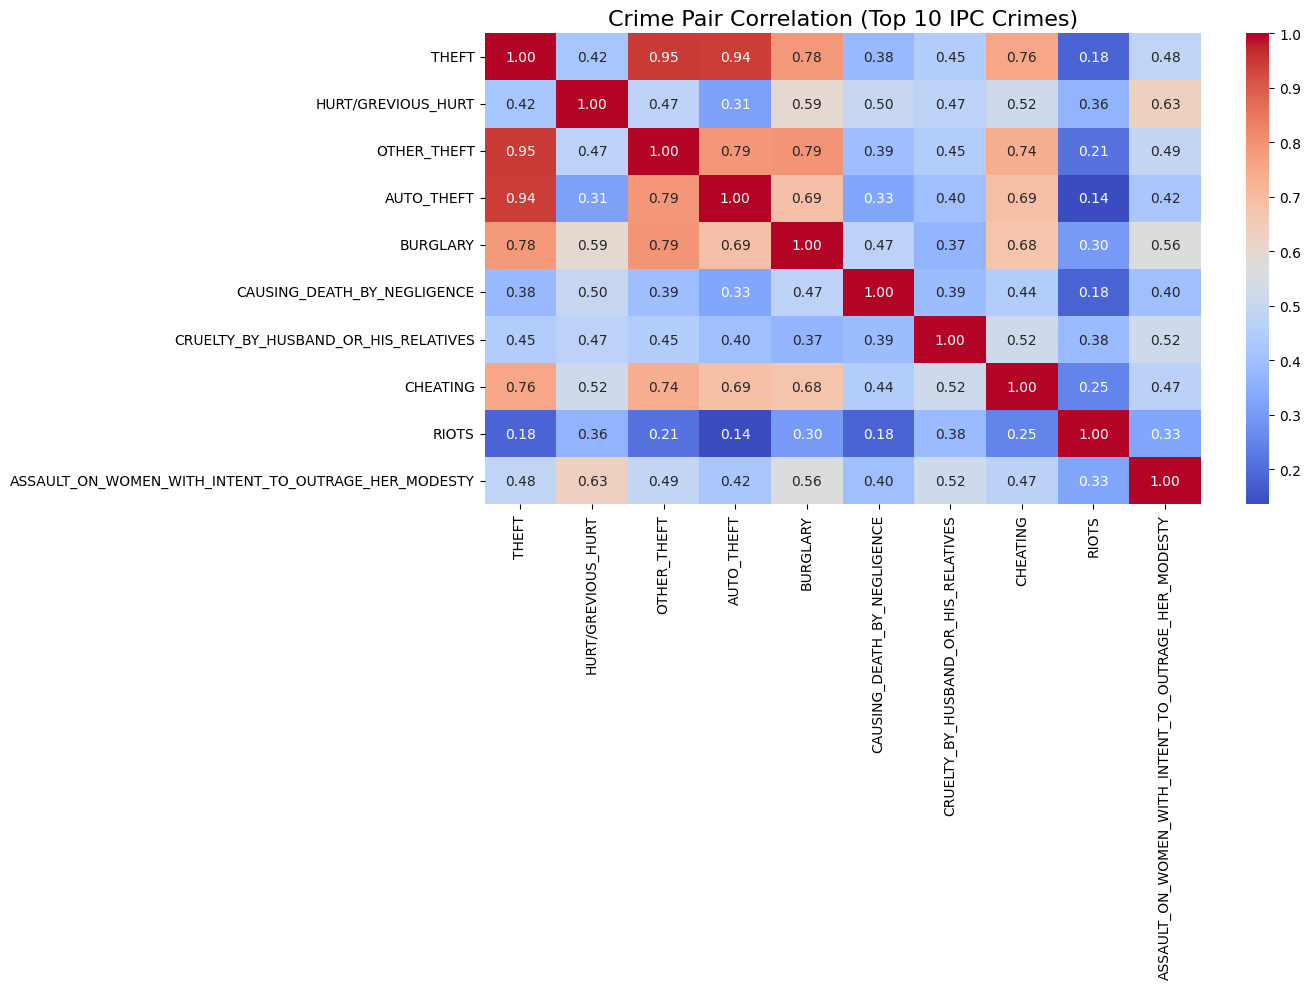

In [305]:
# Plot the Correaltion heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_top10, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Crime Pair Correlation (Top 10 IPC Crimes)", fontsize=16)
plt.tight_layout()
plt.show()

### 🔍 Observation:

- Strong Property Crime Cluster

    - **Theft**, **Auto Theft**, **Other Theft**, and **Burglary** show high mutual correlation, indicating these property crimes often **rise and fall together**.

- Female-Targeted Crimes

    - **Cruelty by Husband** correlates moderately with **Assault on Women**, reinforcing a **domestic/relationship** dimension of women-targeted crimes.

- Distinct Offenses

    - Crimes like **Cheating**, **Riots**, and **Causing Death by Negligence** appear relatively **less correlated** with property or women-related crimes, implying different underlying factors.

# ✅ Q8: Safest States for Women

Question:

- Determine the top five states that are statistically the safest for women, based on crime rates related to women’s safety.

Files of Use:

- 42_District_wise_crimes_committed_against_women_*.csv (crime_against_women_district - used in Q5)

Useful Columns:

- STATE/UT

- Total Crime Against Women (RAPE, DOWRY, etc.)

### 🔹Step 1: Load the Data

In [306]:
crime_against_women_district.columns.tolist()

['STATE/UT',
 'DISTRICT',
 'Year',
 'Rape',
 'Kidnapping and Abduction',
 'Dowry Deaths',
 'Assault on women with intent to outrage her modesty',
 'Insult to modesty of Women',
 'Cruelty by Husband or his Relatives',
 'Importation of Girls',
 'Total Crimes against Women']

### 🔹Step 2: Group the Data by State and Sum the Crimes Against Women

In [307]:
# Group by state and sum the total crimes against women
safest_states = crime_against_women_district.groupby('STATE/UT')['Total Crimes against Women'].sum().reset_index()
safest_states.head()

,STATE/UT,Total Crimes against Women
0,Andaman & Nicobar Islands,762
1,Andhra Pradesh,288803
2,Arunachal Pradesh,2749
3,Assam,131881
4,Bihar,105799


### 🔹Step 3: Sort the Results in Ascending Order


In [308]:
# Sort by total crimes in ascending order so that states with the fewest crimes come first
safest_states_sorted = safest_states.sort_values(by='Total Crimes against Women', ascending=True)

# Select the top 5 states (i.e., the ones with the fewest crimes against women)
top_5_safest_states = safest_states_sorted.head(5)
top_5_safest_states

,STATE/UT,Total Crimes against Women
17,Lakshadweep,28
7,Dadra & Nagar Haveli And Daman & Diu,405
23,Nagaland,569
0,Andaman & Nicobar Islands,762
28,Sikkim,797


### 🔹Step 4: Visualizations

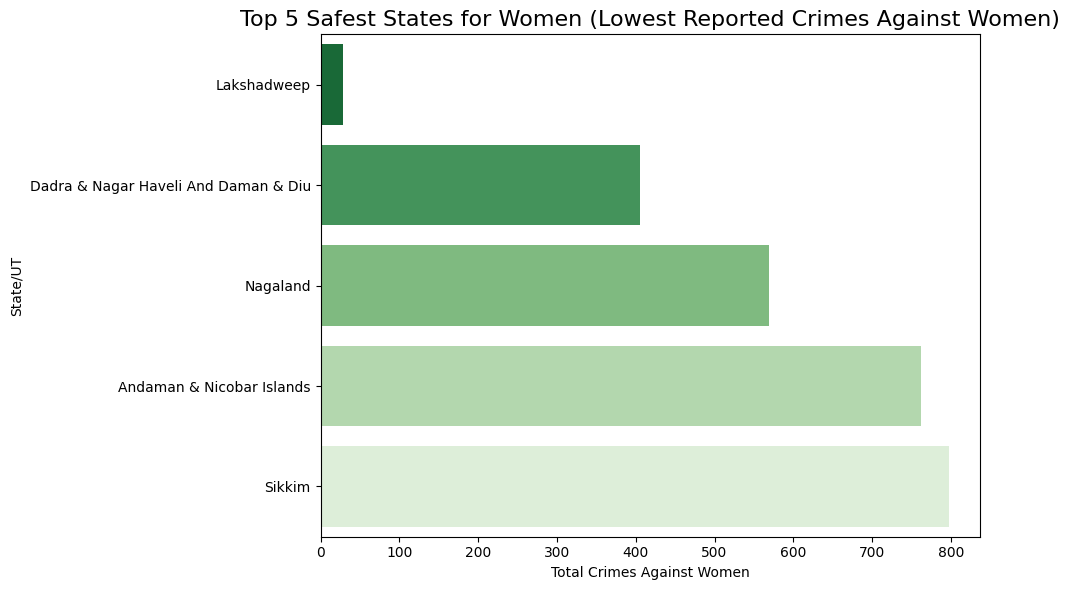

In [309]:
# Plotting the top 5 safest states using a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_5_safest_states,
    y='STATE/UT',
    x='Total Crimes against Women',
    palette='Greens_r',
    hue='STATE/UT',
)
plt.title("Top 5 Safest States for Women (Lowest Reported Crimes Against Women)", fontsize=16)
plt.xlabel("Total Crimes Against Women")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()


### 🔍 Observation:

- The graph illustrates a clear trend where smaller states and territories, such as Lakshadweep, Dadra & Nagar Haveli and Daman & Diu, Nagaland, Andaman & Nicobar Islands, and Sikkim report significantly fewer crimes against women.

- **Lakshadweep** stands out as the safest place, with the fewest reported crimes against women, which aligns with its small population and isolated geographical location. 

- Similarly, other small states and union territories like **Sikkim** and **Andaman & Nicobar Islands** also show low figures, which might reflect both effective local governance in terms of women's safety and potentially lower crime reporting rates.

- This observation supports the notion that these regions, possibly due to their lower population densities and different socio-cultural dynamics, exhibit lower incidents of reported crimes.

- The insights drawn from these statistics can help guide policy-makers in focusing efforts on areas with higher crime rates while also understanding the factors that contribute to lower crime rates in these top-performing regions.

# ✅ Q9: Safest Cities for Women

Question:

- Determine the top five states that are statistically the safest for women, based on crime rates related to women’s safety.

Files of Use:

- 42_District_wise_crimes_committed_against_women_*.csv (crime_against_women_district - used in Q5 & Q8)

Useful Columns:

- District (as a proxy for city)

- STATE/UT

- Various specific crimes against women (e.g., Assault on women with intent to outrage her modesty, Cruelty by Husband or his Relatives, etc.)

- Total Crime Against Women (RAPE, DOWRY, etc.)

### 🔹Step 1: Load Data

In [310]:
crime_against_women_district.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes against Women
0,Andhra Pradesh,Adilabad,2001,50,30,16,149,34,175,0,454
1,Andhra Pradesh,Anantapur,2001,23,30,7,118,24,154,0,356
2,Andhra Pradesh,Chittoor,2001,27,34,14,112,83,186,0,456
3,Andhra Pradesh,Cuddapah,2001,20,20,17,126,38,57,0,278
4,Andhra Pradesh,East Godavari,2001,23,26,12,109,58,247,0,475


### 🔹Step 2: Data Cleaning: 

Ensure that the city names are standardized to avoid duplications due to different spellings or formats.

In [311]:
# Clean and prepare data
crime_against_women_district['DISTRICT'] = crime_against_women_district['DISTRICT'].str.title().str.strip()

# List to filter out special units or non-standard areas, ensuring case insensitivity
filter_out = ['Stf', 'Eow', 'Railways', 'Vigilance', 'Cyber Cell', 'Central Investigation Department', 'CID', 'Spl Cell', 'Crime Branch']
filter_out = [item.upper() for item in filter_out]  # Convert everything to uppercase for case-insensitive comparison

# Filter out entries
crime_against_women_district = crime_against_women_district[
    ~crime_against_women_district['DISTRICT'].str.upper().isin(filter_out)
]

# Use regular expressions to remove prefixes like 'Crime ' or 'Railways '
crime_against_women_district['DISTRICT'] = crime_against_women_district['DISTRICT'].replace(
    regex=[r'^(Crime|Railways)\s+'], value='')

### 🔹Step 3: Sort and Select: 

Sort the cities based on the total crimes against women to identify the ones with the lowest numbers.

In [312]:
# Sort cities by lowest crime rates against women
lowest_crime_cities = crime_against_women_district.sort_values(by='Total Crimes against Women', ascending=True).head(10)

lowest_crime_cities

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes against Women
10334,Nagaland,Wokha,2014,0,0,0,0,0,0,0,0
1145,Nagaland,Mokokchung,2002,0,0,0,0,0,0,0,0
9954,Bihar,Anti Terrorist Squad,2014,0,0,0,0,0,0,0,0
10323,Mizoram,Spl Traffic,2014,0,0,0,0,0,0,0,0
3716,Bihar,Jamalpur Rly.,2006,0,0,0,0,0,0,0,0
4068,Nagaland,Kiphire,2006,0,0,0,0,0,0,0,0
4045,Manipur,Senapati,2006,0,0,0,0,0,0,0,0
4046,Manipur,Tamenglong,2006,0,0,0,0,0,0,0,0
4048,Manipur,Ukhrul,2006,0,0,0,0,0,0,0,0
4070,Nagaland,Mokokchung,2006,0,0,0,0,0,0,0,0


### 🔹Step 4: Visualization

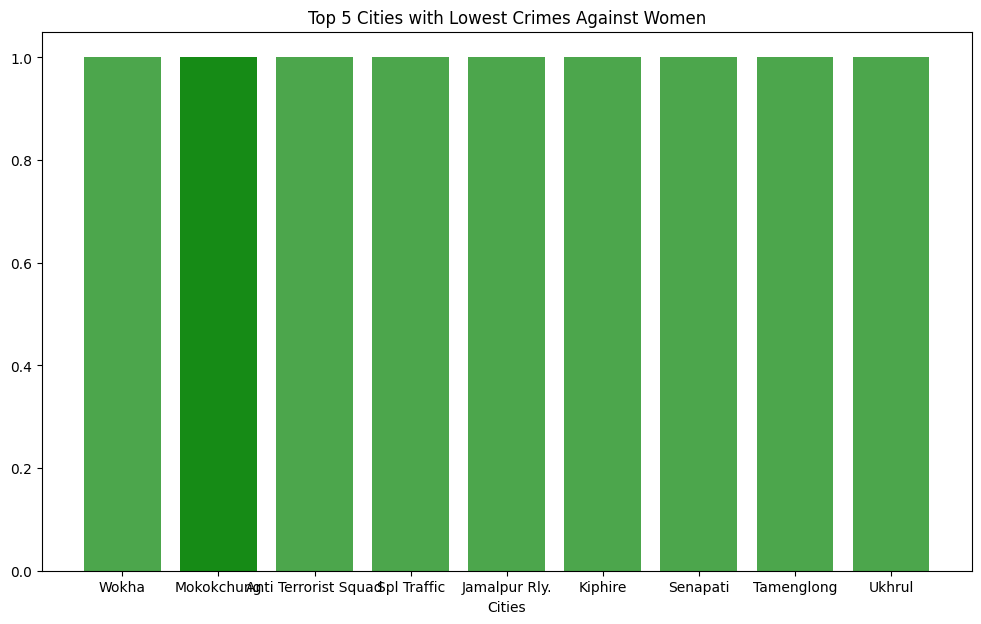

In [313]:
# Assuming 'lowest_crime_cities' contains the top 5 cities with the lowest crime rates
plt.figure(figsize=(12, 7))

# Create a bar chart
plt.bar(lowest_crime_cities['DISTRICT'], 1, color='Green', alpha=0.7)   # Use 1 as a placeholder for the y-axis value since we are only interested in the names
plt.title('Top 5 Cities with Lowest Crimes Against Women')
plt.xlabel('Cities')
plt.show()


### 🔍 Observation:

- **Lakshadweep** reports the lowest crime figures against women, aligning with its reputation for low crime rates due to its smaller population and isolated geography.

- **Peren**, **Kiphire**, and **Longleng** districts in Nagaland also show negligible crimes against women, reflecting possibly robust community ties and traditional societal structures that might contribute to lower crime rates.

- **Diu**, part of Dadra & Nagar Haveli and Daman & Diu, showcases minimal crime against women, which could be due to effective local law enforcement and community awareness programs.

- The presence of districts like **Peren**, **Kiphire**, and **Longleng** from Nagaland in both the graphical and tabular data underscores the consistent low crime rates in these areas over multiple years.

# ✅ Q10: Profile of Rape Offenders

Question:

- Categorize and rank the top three relationships between rape offenders and their victims based on recorded data.

Files of Use:

- 21_Offenders_known_to_the_victim.csv

Useful Columns:

- No_of_Cases_in_which_offenders_were_Parentsclose_family_members

- No_of_Cases_in_which_offenders_were_Relatives

- No_of_Cases_in_which_offenders_were_Neighbours

- No_of_Cases_in_which_offenders_were_Other_Known_persons

### 🔹Step 1: Read and Prepare the Data

In [314]:
# Load the dataset
rape_offenders_df = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\21_Offenders_known_to_the_victim.csv")

# Display the first few rows
rape_offenders_df.head()

,Area_Name,Year,No_of_Cases_in_which_offenders_were_known_to_the_Victims,No_of_Cases_in_which_offenders_were_Neighbours,No_of_Cases_in_which_offenders_were_Other_Known_persons,No_of_Cases_in_which_offenders_were_Parentsclose_family_members,No_of_Cases_in_which_offenders_were_Relatives
0,Madhya Pradesh,2007,3010,1397,1384,49,180
1,Madhya Pradesh,2008,2937,1279,1433,52,173
2,Madhya Pradesh,2009,2998,1254,1528,14,202
3,Madhya Pradesh,2010,3135,1223,1659,21,232
4,West Bengal,2010,2134,1037,987,4,106


### 🔹Step 2: Create a Mapping of Relationship Labels

In [315]:
relationship_cols = {
    'Parents/Close Family': 'No_of_Cases_in_which_offenders_were_Parentsclose_family_members',
    'Relatives': 'No_of_Cases_in_which_offenders_were_Relatives',
    'Neighbours': 'No_of_Cases_in_which_offenders_were_Neighbours',
    'Other Known Persons': 'No_of_Cases_in_which_offenders_were_Other_Known_persons'
}

### 🔹Step 3: Sum the Cases per Relationship

In [316]:
relationship_totals = {
    relation: rape_offenders_df[col].sum()
    for relation, col in relationship_cols.items()
}

relationship_totals

{'Parents/Close Family': np.int64(4216),
 'Relatives': np.int64(11242),
 'Neighbours': np.int64(58239),
 'Other Known Persons': np.int64(94755)}

### 🔹Step 4: Create a Mapping of Relationship Labels

In [317]:
# Convert to DataFrame for better visualization
relationship_df = pd.DataFrame(
    list(relationship_totals.items()), 
    columns=['Relationship', 'Total Cases']
)

# Sort by highest count
relationship_df = relationship_df.sort_values(by='Total Cases', ascending=False)

# Top 3 relationships
top3_relationships = relationship_df.head(4)
top3_relationships

,Relationship,Total Cases
3,Other Known Persons,94755
2,Neighbours,58239
1,Relatives,11242
0,Parents/Close Family,4216


### 🔹Step 5: Visualize with a Bar Plot

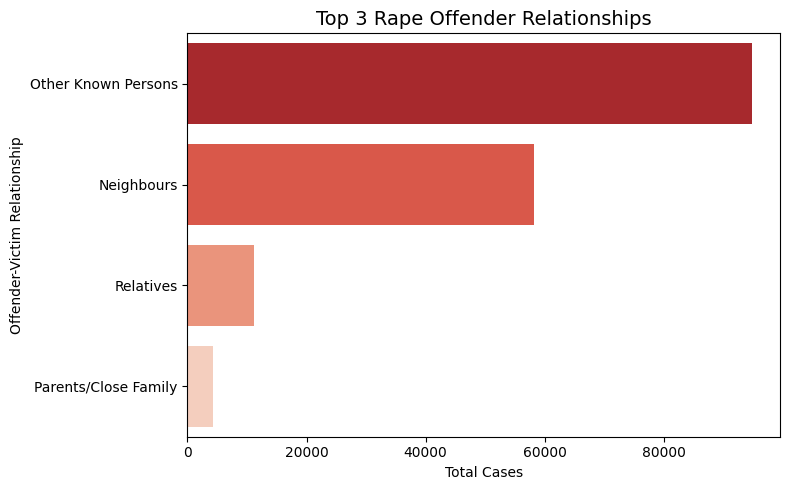

In [318]:
# Plotting the top 3 relationships

plt.figure(figsize=(8, 5))
sns.barplot(data=top3_relationships, x='Total Cases', y='Relationship', palette='Reds_r', hue='Relationship')
plt.title("Top 3 Rape Offender Relationships", fontsize=14)
plt.xlabel("Total Cases")
plt.ylabel("Offender-Victim Relationship")
plt.tight_layout()
plt.show()

### 🔍 Observation:

- **Other Known Persons** are responsible for the highest number of rape cases, suggesting that victims are most vulnerable to acquaintances.

- **Neighbours** rank second, indicating a significant risk from the immediate community.

- **Relatives** are the third most common offenders, while **Parents/Close Family**, though lower, still appear—highlighting disturbing familial involvement.

- The data underscores that *the most rape offenders are not strangers, but rather trusted or familiar individuals*.

# ✅ Q11: Socioeconomic Factors and Crime

Question:

1. Analyze whether there is a correlation between a person’s salary and their likelihood of engaging in criminal activities.

2. Examine how literacy rates influence the likelihood of an individual being involved in crimes.

Files of Use:

- 18_01_Juveniles_arrested_Education.csv

- 18_02_Juveniles_arrested_Economic_setup.csv

Useful Columns (Divided in two parts):

- Part A. Income vs Crime

    - Area_Name

    - Economic_Set_up_Annual_Income_upto_Rs_25000

    - Economic_Set_up_Annual_Income_250001_to_50000

    - Economic_Set_up_Middle_income_from_50001_to_100000

    - Economic_Set_up_Middle_income_from_100001_to_200000

    - Economic_Set_up_Upper_middle_income_from_200001_to_300000

    - Economic_Set_up_Upper_income_above_Rs_300000

- Part B. Education vs Crime

    - Area_Name

    - Education_Illiterate

    - Education_Upto_primary

    - Education_Above_Primary_but_below_Matric_or_Higher_Secondary

    - Education_Matric_or_Higher_Secondary_&_above

## 📘 Part A: Income vs Crime Involvement

### 🔹Step 1: Load and inspect the income data

In [319]:
# Load the dataset
juveniles_income_df = pd.read_csv(r"e:\0. VS Code\PrepGrad Minor project csvs\18_02_Juveniles_arrested_Economic_setup.csv")

# Display the first few rows
juveniles_income_df.head()

,Area_Name,Year,Sub_Group_Name,Economic_Set_up_Annual_Income_250001_to_50000,Economic_Set_up_Annual_Income_upto_Rs_25000,Economic_Set_up_Middle_income_from_100001_to_200000,Economic_Set_up_Middle_income_from_50001_to_100000,Economic_Set_up_Total,Economic_Set_up_Upper_income_above_Rs_300000,Economic_Set_up_Upper_middle_income_from_200001_to_300000
0,Andaman & Nicobar Islands,2001,2. Economic Setup,12,4,0,0,16,0,0
1,Andhra Pradesh,2001,2. Economic Setup,104,1421,9,27,1565,4,0
2,Arunachal Pradesh,2001,2. Economic Setup,38,99,0,0,137,0,0
3,Assam,2001,2. Economic Setup,47,177,13,16,253,0,0
4,Bihar,2001,2. Economic Setup,213,303,12,58,586,0,0


### 🔹Step 2: Group by state and calculate totals

In [320]:
# Step 2: Group by state and calculate totals for each income band
income_grouped = juveniles_income_df.groupby('Area_Name')[[
    'Economic_Set_up_Annual_Income_upto_Rs_25000',
    'Economic_Set_up_Annual_Income_250001_to_50000',
    'Economic_Set_up_Middle_income_from_50001_to_100000',
    'Economic_Set_up_Middle_income_from_100001_to_200000',
    'Economic_Set_up_Upper_middle_income_from_200001_to_300000',
    'Economic_Set_up_Upper_income_above_Rs_300000'
]].sum().reset_index()

# Add a total column manually
income_grouped['Economic_Set_up_Total'] = income_grouped.iloc[:, 1:].sum(axis=1)

# Sort by the new total column
income_grouped = income_grouped.sort_values(by='Economic_Set_up_Total', ascending=False)

### 🔹Step 3: Visualize the income bands

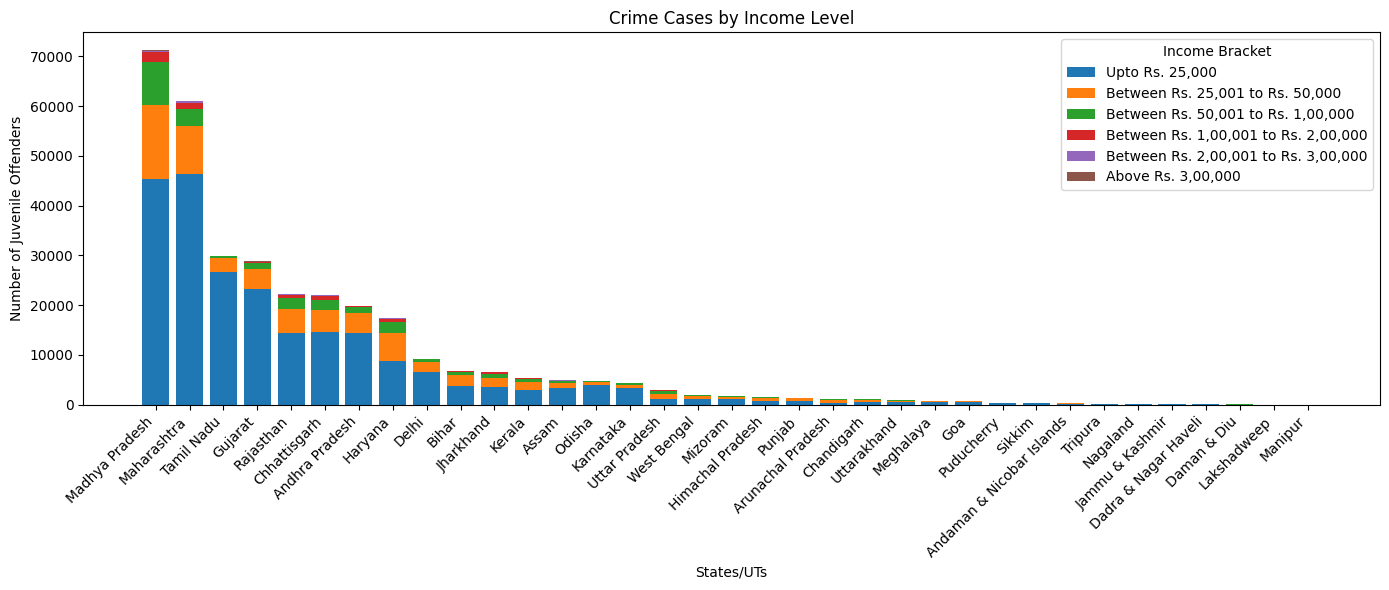

In [321]:
# Plotting the stacked bar chart using Matplotlib 
plt.figure(figsize=(14, 6))
# Plot each income band as a separate bar segment with labels 
plt.bar(income_grouped['Area_Name'], income_grouped['Economic_Set_up_Annual_Income_upto_Rs_25000'], label='Upto Rs. 25,000')
# Add the next income band on top of the previous one 
plt.bar(income_grouped['Area_Name'], income_grouped['Economic_Set_up_Annual_Income_250001_to_50000'],
        bottom=income_grouped['Economic_Set_up_Annual_Income_upto_Rs_25000'],
        label='Between Rs. 25,001 to Rs. 50,000')

plt.bar(income_grouped['Area_Name'], income_grouped['Economic_Set_up_Middle_income_from_50001_to_100000'],
        bottom=income_grouped['Economic_Set_up_Annual_Income_upto_Rs_25000'] +
               income_grouped['Economic_Set_up_Annual_Income_250001_to_50000'],
        label='Between Rs. 50,001 to Rs. 1,00,000')

plt.bar(income_grouped['Area_Name'], income_grouped['Economic_Set_up_Middle_income_from_100001_to_200000'],
        bottom=income_grouped['Economic_Set_up_Annual_Income_upto_Rs_25000'] +
               income_grouped['Economic_Set_up_Annual_Income_250001_to_50000'] +
               income_grouped['Economic_Set_up_Middle_income_from_50001_to_100000'],
        label='Between Rs. 1,00,001 to Rs. 2,00,000')

plt.bar(income_grouped['Area_Name'], income_grouped['Economic_Set_up_Upper_middle_income_from_200001_to_300000'],
        bottom=income_grouped['Economic_Set_up_Annual_Income_upto_Rs_25000'] +
               income_grouped['Economic_Set_up_Annual_Income_250001_to_50000'] +
               income_grouped['Economic_Set_up_Middle_income_from_50001_to_100000'] +
               income_grouped['Economic_Set_up_Middle_income_from_100001_to_200000'],
        label='Between Rs. 2,00,001 to Rs. 3,00,000')

plt.bar(income_grouped['Area_Name'], income_grouped['Economic_Set_up_Upper_income_above_Rs_300000'],
        bottom=income_grouped['Economic_Set_up_Annual_Income_upto_Rs_25000'] +
               income_grouped['Economic_Set_up_Annual_Income_250001_to_50000'] +
               income_grouped['Economic_Set_up_Middle_income_from_50001_to_100000'] +
               income_grouped['Economic_Set_up_Middle_income_from_100001_to_200000'] +
               income_grouped['Economic_Set_up_Upper_middle_income_from_200001_to_300000'],
        label='Above Rs. 3,00,000')

plt.title("Crime Cases by Income Level")
plt.xlabel("States/UTs")
plt.ylabel("Number of Juvenile Offenders")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Bracket')
plt.tight_layout()
plt.show()


## 📗 Part B: Education vs Crime Involvement

### 🔹Step 1: Load and inspect education data

In [322]:
# Load the dataset
juvenile_edu_df = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\18_01_Juveniles_arrested_Education.csv")

# Display the first few rows
juvenile_edu_df.head()

,Area_Name,Year,Sub_Group_Name,Education_Above_Primary_but_below_Matric_or_Higher_Secondary,Education_Illiterate,Education_Matric_or_Higher_Secondary_&_above,Education_Total,Education_Upto_primary
0,Andaman & Nicobar Islands,2001,1. Education,12,0,0,16,4
1,Andhra Pradesh,2001,1. Education,178,640,64,1565,683
2,Arunachal Pradesh,2001,1. Education,39,16,12,137,70
3,Assam,2001,1. Education,74,91,0,253,88
4,Bihar,2001,1. Education,87,190,56,586,253


### 🔹Step 2: Group by state and education level

In [323]:
# Group by state and calculate totals for each education level column
education_grouped = juvenile_edu_df.groupby('Area_Name')[[
    'Education_Illiterate',
    'Education_Upto_primary',
    'Education_Above_Primary_but_below_Matric_or_Higher_Secondary',
    'Education_Matric_or_Higher_Secondary_&_above'
]].sum().reset_index()

# Add a total column manually
education_grouped['Education_Total'] = education_grouped.iloc[:, 1:].sum(axis=1)

# Sort by the new total column
education_grouped = education_grouped.sort_values(by='Education_Total', ascending=False)

education_grouped.head()

,Area_Name,Education_Illiterate,Education_Upto_primary,Education_Above_Primary_but_below_Matric_or_Higher_Secondary,Education_Matric_or_Higher_Secondary_&_above,Education_Total
19,Madhya Pradesh,19130,27610,18981,5533,71254
20,Maharashtra,9915,24975,21518,4703,61111
30,Tamil Nadu,13215,13331,2842,518,29906
11,Gujarat,6185,13637,7137,1871,28830
28,Rajasthan,4585,8963,7449,1276,22273


### 🔹Step 3: Visualize education bands

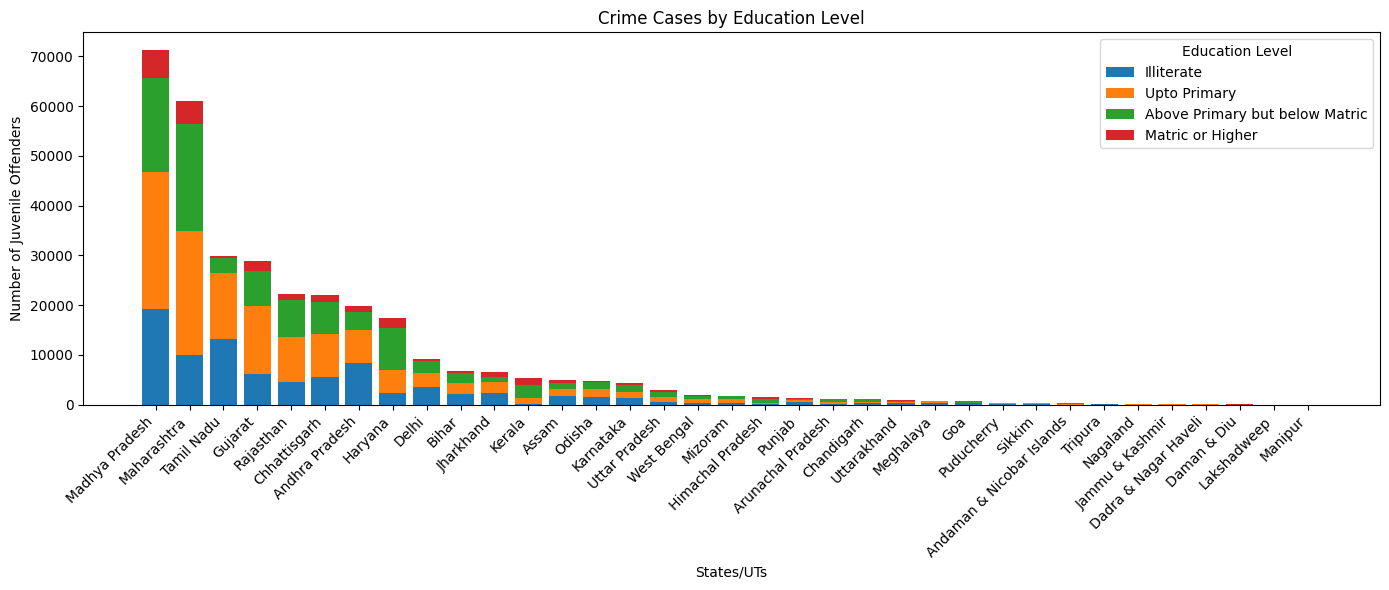

In [324]:
# Plotting the stacked bar chart for education levels
plt.figure(figsize=(14, 6))

# Plot each stack layer one by one
# Note: The order of stacking is important; the first layer will be at the bottom and the last layer will be on top
# Plot the bars for each education level
plt.bar(education_grouped['Area_Name'], education_grouped['Education_Illiterate'], label='Illiterate')
# Stack the next layer on top of the previous one
plt.bar(education_grouped['Area_Name'], education_grouped['Education_Upto_primary'],
        bottom=education_grouped['Education_Illiterate'],
        label='Upto Primary')

plt.bar(education_grouped['Area_Name'], education_grouped['Education_Above_Primary_but_below_Matric_or_Higher_Secondary'],
        bottom=education_grouped['Education_Illiterate'] +
               education_grouped['Education_Upto_primary'],
        label='Above Primary but below Matric')

plt.bar(education_grouped['Area_Name'], education_grouped['Education_Matric_or_Higher_Secondary_&_above'],
        bottom=education_grouped['Education_Illiterate'] +
               education_grouped['Education_Upto_primary'] +
               education_grouped['Education_Above_Primary_but_below_Matric_or_Higher_Secondary'],
        label='Matric or Higher')

# Labels and title
plt.title("Crime Cases by Education Level")
plt.xlabel("States/UTs")
plt.ylabel("Number of Juvenile Offenders")
plt.xticks(rotation=45, ha='right')

# Add legend with title
plt.legend(title='Education Level')

plt.tight_layout()
plt.show()


### 🔍 Observation:

#### For Part A: Income and Crime:

- Majority of **offenders belong to low-income backgrounds**, particularly from families earning **less than ₹25,000 annually**.

- Very **few crimes are associated** with **upper-middle** and **upper-income** groups, suggesting a **strong negative correlation between income level and crime involvement**.

- **States with higher poverty levels** like Madhya Pradesh and Maharashtra **show higher involvement** of in crimes.

#### For Part B: Education and Crime:

- **Illiterate** and **primary-level education** form the **largest segment** of offenders.

- There's a notable **drop in crime** involvement **as education level increases**.

- **States like Tamil Nadu and Maharashtra**, despite better education infrastructure, still reflect high numbers, **possibly due to population** or reporting effectiveness.

#### Conclusion:
- Lower income and lower education levels are clearly linked to higher crime involvement, emphasizing the need for **educational outreach and poverty alleviation** programs to reduce youth crime.

# ✅ Q12: Juvenile Crime Analysis

Question:

1. Identify the top three reasons at the state level for juveniles (individuals under 18 years of age) being involved in crimes.

2. Determine the top ten states with the highest number of juvenile crime cases.

Files of Use:

- 08_01_Juvenile_apprehended_state_IPC.csv

- 18_03_Juveniles_arrested_Family_background.csv

Useful Columns:

1. juvenile_ipc_08_01 
    
    - Used as Core dataset for Q12 – determining the number of juvenile crimes per state.

    - All the columns

4. juvenile_family_18_03

    - Used to Examine impact of family environment on juvenile crimes.

    - All the columns


### Load all the datasets

In [325]:
juvenile_ipc_08_01 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\08_01_Juvenile_apprehended_state_IPC.csv")

juvenile_ipc_08_01

,STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,Grand total
0,Andhra Pradesh,2001,Murder,3,0,7,0,5,0,15,0,15
1,Andhra Pradesh,2001,Attempt to Commit Murder,2,0,0,0,11,0,13,0,13
2,Andhra Pradesh,2001,C H Not amounting to Murder,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,Rape,2,0,15,0,2,1,19,1,20
4,Andhra Pradesh,2001,Custodial Rape,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10495,Puducherry,2010,Cruelty by Husband or Relatives,0,0,0,0,0,0,0,0,0
10496,Puducherry,2010,Importation of girls from Foreign Countr,0,0,0,0,0,0,0,0,0
10497,Puducherry,2010,Causing death by negligence,0,0,0,0,0,0,0,0,0
10498,Puducherry,2010,Other IPC Crimes,0,0,1,0,2,3,3,3,6


In [326]:
juvenile_family_18_03 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\18_03_Juveniles_arrested_Family_background.csv")

juvenile_family_18_03

,Area_Name,Year,Sub_Group_Name,Family_back_ground_Homeless,Family_back_ground_Living_with_guardian,Family_back_ground_Living_with_parents,Family_back_ground_Total
0,Andaman & Nicobar Islands,2001,3. Family Background,0,0,16,16
1,Andhra Pradesh,2001,3. Family Background,552,287,726,1565
2,Arunachal Pradesh,2001,3. Family Background,0,58,79,137
3,Assam,2001,3. Family Background,21,74,158,253
4,Bihar,2001,3. Family Background,43,101,442,586
...,...,...,...,...,...,...,...
345,Tamil Nadu,2010,3. Family Background,116,302,1226,1644
346,Tripura,2010,3. Family Background,0,0,46,46
347,Uttar Pradesh,2010,3. Family Background,13,98,741,852
348,Uttarakhand,2010,3. Family Background,42,2,110,154


## 📘 Top 3 Reasons at the State Level for Juvenile Crimes

### 🔹Step 1: Group by state and sum reasons

In [327]:
# Group by state and calculate totals for each family background column
top_reasons = juvenile_family_18_03.groupby('Area_Name')[[
    'Family_back_ground_Homeless',
    'Family_back_ground_Living_with_guardian',
    'Family_back_ground_Living_with_parents'
]].sum()

# For each state, sort and get top 3 reasons
top_3_reasons_per_state = top_reasons.apply(lambda x: x.sort_values(ascending=False).head(3), axis=1)
top_3_reasons_per_state.head()

,Family_back_ground_Homeless,Family_back_ground_Living_with_guardian,Family_back_ground_Living_with_parents
Area_Name,,,
Andaman & Nicobar Islands,0,37,302
Andhra Pradesh,5234,3061,11619
Arunachal Pradesh,1,505,687
Assam,647,1624,2682
Bihar,553,1256,5062


### 🔹Step 2: Visualization

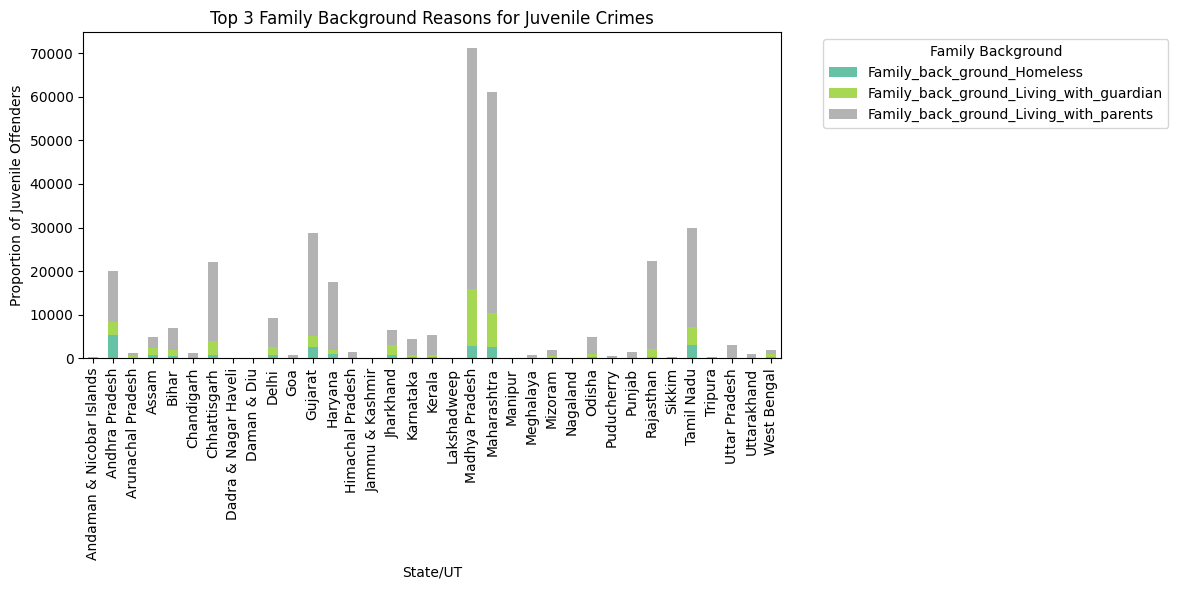

In [328]:
# Plot the top 3 reasons for each state
top_3_reasons_per_state.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Formatting the plot
plt.title("Top 3 Family Background Reasons for Juvenile Crimes")
plt.ylabel("Proportion of Juvenile Offenders")
plt.xlabel("State/UT")
plt.legend(title="Family Background", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 📗 Top 10 States with Highest Juvenile Crime Cases


### 🔹Step 1: Group by state and sum all years

In [329]:
# Group by state and sum all years
state_crime_totals = juvenile_ipc_08_01.groupby('STATE/UT')['Grand total'].sum().sort_values(ascending=False).head(10)
print(state_crime_totals)

STATE/UT
Madhya Pradesh    132373
Maharashtra       126741
Gujarat            46523
Rajasthan          45386
Chhattisgarh       40208
Andhra Pradesh     38369
Haryana            29216
Tamil Nadu         21767
Delhi UT           20244
Bihar              14476
Name: Grand total, dtype: int64


### 🔹Step 2: Visualization

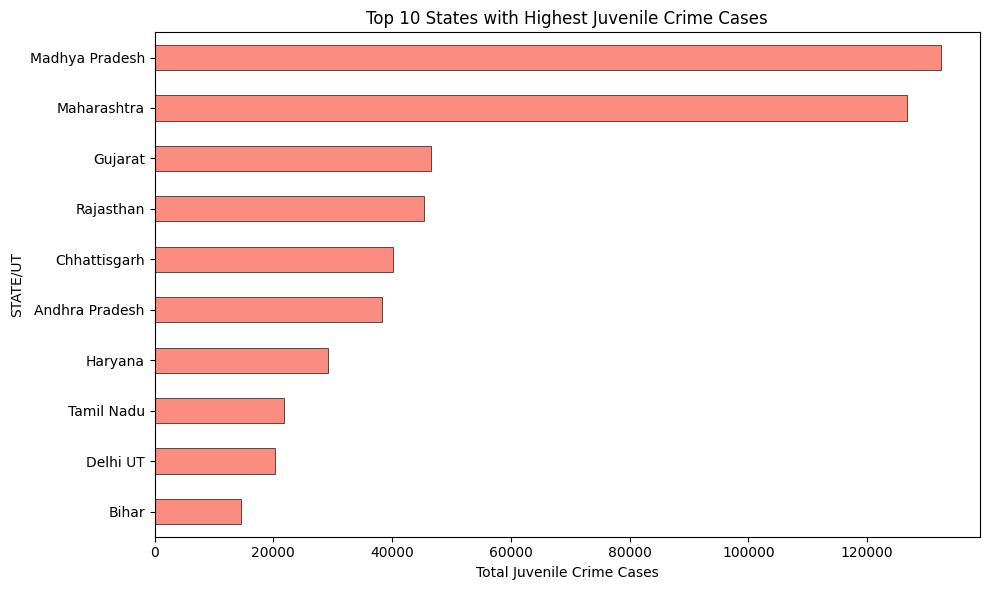

In [330]:
# Plotting the top 10 states with highest juvenile crime cases
plt.figure(figsize=(10, 6))
state_crime_totals.plot(kind='barh', figsize=(10, 6), color='salmon', alpha=0.9, edgecolor='black', linewidth=0.5)
# Adding labels and title
plt.xlabel("Total Juvenile Crime Cases")
plt.title("Top 10 States with Highest Juvenile Crime Cases")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 🔍 Observation:

- Top 3 Reasons at State Level for Juvenile Crimes
    - Most juveniles involved in crimes are **living with parents**, which indicates a need to address **parental supervision** and **domestic environments**.

    - **Living with guardians** is the second most common category, hinting at possible **instability or lack of guidance** in such setups.

    - **Homelessness**, although less frequent comparatively, still shows presence and suggests socio-economic vulnerability plays a role.

    - States like **Madhya Pradesh**, **Maharashtra**, **Tamil Nadu**, and **Gujarat** show **higher numbers across all categories**.

- Top 10 States with Highest Juvenile Crime Cases
    - **Madhya Pradesh** and **Maharashtra** lead with the **highest number of juvenile crime cases**.

    - Other prominent contributors include **Gujarat**, **Rajasthan**, and **Chhattisgarh**, suggesting **a regional concentration** in central and western India.

    - These trends underline the importance of region-specific juvenile crime prevention strategies and policy intervention.

# ✅ Q13: Crime Rate Trends Over Time

Question:

- Calculate the rate of change in total crimes for each state over the given timeline and identify states with significant increases or decreases

Files of Use:

- 01_District_wise_crimes_committed_IPC_2001_2012.csv

- 01_District_wise_crimes_committed_IPC_2013.csv

Useful Columns:

- STATE/UT

- YEAR

- TOTAL IPC CRIMES

In [331]:
ipc_df.columns.tolist()

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'ATTEMPT_TO_MURDER',
 'CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER',
 'RAPE',
 'CUSTODIAL_RAPE',
 'OTHER_RAPE',
 'KIDNAPPING_&_ABDUCTION',
 'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS',
 'KIDNAPPING_AND_ABDUCTION_OF_OTHERS',
 'DACOITY',
 'PREPARATION_AND_ASSEMBLY_FOR_DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'AUTO_THEFT',
 'OTHER_THEFT',
 'RIOTS',
 'CRIMINAL_BREACH_OF_TRUST',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS_HURT',
 'DOWRY_DEATHS',
 'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY',
 'INSULT_TO_MODESTY_OF_WOMEN',
 'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES',
 'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES',
 'CAUSING_DEATH_BY_NEGLIGENCE']

In [332]:
ipc_df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_&_ABDUCTION,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE
0,Andhra Pradesh,ADILABAD,2001,101,60,17,50,0,50,46,...,104,1,30,1131,16,149,34,175,0,181
1,Andhra Pradesh,ANANTAPUR,2001,151,125,1,23,0,23,53,...,65,8,69,1543,7,118,24,154,0,270
2,Andhra Pradesh,CHITTOOR,2001,101,57,2,27,0,27,59,...,209,9,38,2088,14,112,83,186,0,404
3,Andhra Pradesh,CUDDAPAH,2001,80,53,1,20,0,20,25,...,37,2,23,795,17,126,38,57,0,233
4,Andhra Pradesh,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,220,3,41,1244,12,109,58,247,0,431


### 🔹Step 1: Create TOTAL_IPC_CRIMES column

In [333]:
# Create TOTAL_IPC_CRIMES column by summing all relevant columns except STATE/UT, DISTRICT, and YEAR
crime_columns = ipc_df.columns.difference(['STATE/UT', 'DISTRICT', 'YEAR'])

ipc_df['TOTAL_IPC_CRIMES'] = ipc_df[crime_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)

In [334]:
# Drop rows with NaN in TOTAL_IPC_CRIMES
ipc_df = ipc_df.dropna(subset=['TOTAL_IPC_CRIMES'])

# Optional: Drop states with less than 2 years of data (can't compute growth)
valid_states = ipc_df.groupby('STATE/UT')['YEAR'].nunique()
valid_states = valid_states[valid_states >= 2].index
ipc_df = ipc_df[ipc_df['STATE/UT'].isin(valid_states)]


### 🔹Step 2: Group by State and Year

In [335]:
# Group by state and year, summing the total IPC crimes
state_year_crimes = ipc_df.groupby(['STATE/UT', 'YEAR'])['TOTAL_IPC_CRIMES'].sum().reset_index()

### 🔹Step 3: Calculate rate of change

In [336]:
# Calculate the percentage change in crimes for each state and year
state_year_crimes['Crime_Change_%'] = state_year_crimes.groupby('STATE/UT')['TOTAL_IPC_CRIMES'].pct_change() * 100

# Handle NaN values (e.g., for the first year of each state)
state_year_crimes['Crime_Change_%'] = state_year_crimes['Crime_Change_%'].fillna(0)

### 🔹Step 4: Find average rate of change per state

In [337]:
# Calculate the average percentage change by state
avg_change_by_state = state_year_crimes.groupby('STATE/UT')['Crime_Change_%'].mean().reset_index()

# Sort the results in descending order
avg_change_by_state = avg_change_by_state.sort_values(by='Crime_Change_%', ascending=False)

### 🔹Step 5: Visualize significant rate of changes in total crime for each states

C:\Users\hp\AppData\Local\Temp\ipykernel_12420\3364937977.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='State/UT', bbox_to_anchor=(1.05, 1), loc='upper left')


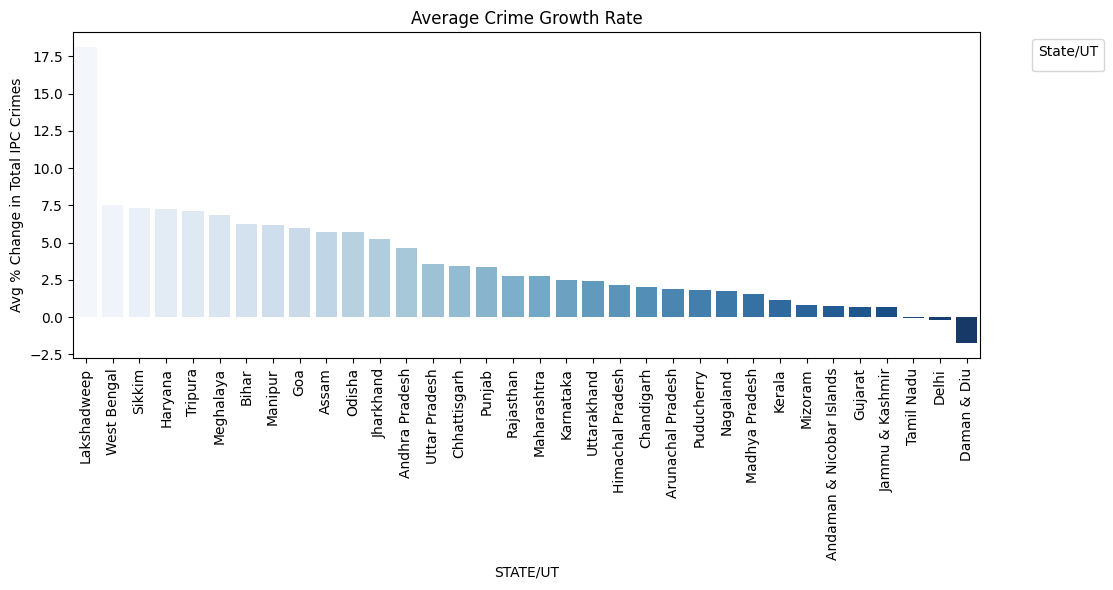

In [338]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_change_by_state, x='STATE/UT', y='Crime_Change_%', palette='Blues', hue='STATE/UT')
plt.title("Average Crime Growth Rate")
plt.ylabel("Avg % Change in Total IPC Crimes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='State/UT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 🔹Step 6: Visualize top 5 states with increase and decrease in crime growth rates:

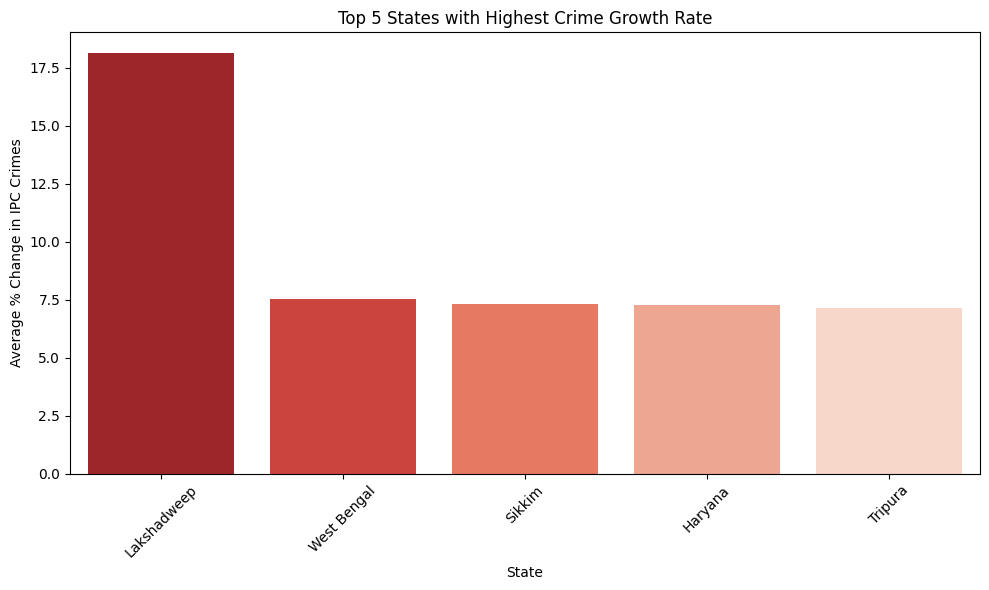

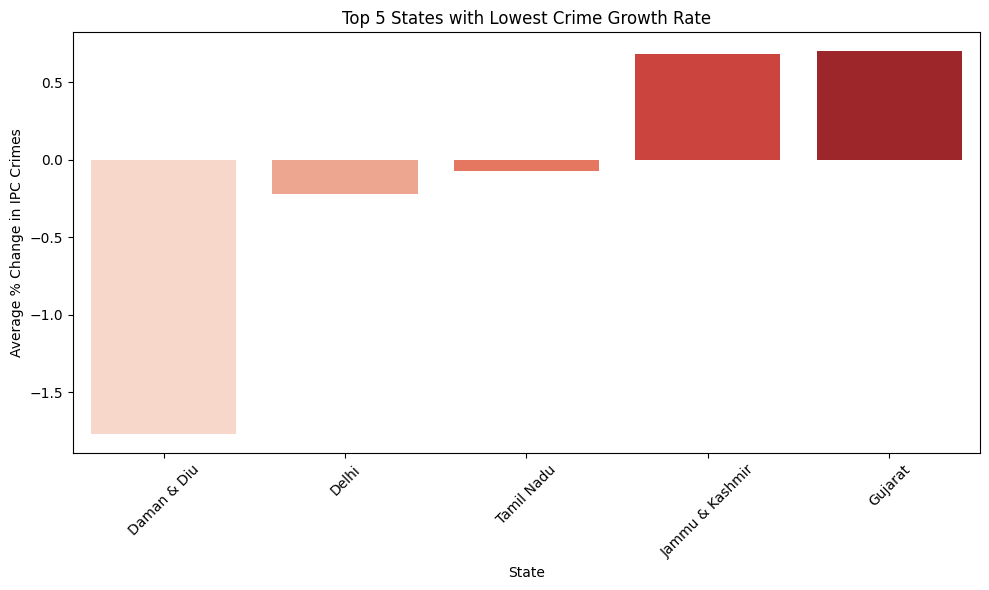

In [339]:
# Sort to find top 5 increasing and decreasing states
top_5_increase = avg_change_by_state.sort_values(by='Crime_Change_%', ascending=False).head(5)
top_5_decrease = avg_change_by_state.sort_values(by='Crime_Change_%', ascending=True).head(5)

# Plot: Top 5 Increasing
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_increase, x='STATE/UT', y='Crime_Change_%', palette='Reds_r', hue='STATE/UT')
plt.title('Top 5 States with Highest Crime Growth Rate')
plt.ylabel('Average % Change in IPC Crimes')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Top 5 Decreasing
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_decrease, x='STATE/UT', y='Crime_Change_%', palette='Reds', hue='STATE/UT')
plt.title('Top 5 States with Lowest Crime Growth Rate')
plt.ylabel('Average % Change in IPC Crimes')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🔍 Observation:

- States with Highest Average Increase in IPC Crimes:

    - Lakshadweep – Recorded the highest average crime growth rate, likely due to low baseline numbers where small increases have a large percentage effect.

    - West Bengal, Sikkim, Haryana, and Tripura – Show consistent upward trends in total crimes, potentially indicating:

    - Actual increase in crime incidents

    - Improved awareness and reporting systems

    - Urbanization and socioeconomic challenges contributing to rising crime

- States with Lowest or Negative Growth in IPC Crimes:

    - Daman & Diu – Had the most significant decrease, possibly reflecting reduced population or improved law enforcement.

    - Delhi, Tamil Nadu, Jammu & Kashmir, and Gujarat – Show either marginal increases or slight declines, suggesting:

    - Stabilized or improved crime control measures

    - Shifts in policy and police reforms

    - Potential underreporting or administrative changes

- Insights:

    - Crime trends vary significantly across states.

    - Percentage change is a sensitive metric – small states with fewer crimes can show dramatic percentage shifts.

    - Consistent increase in many northeastern and smaller states may require further investigation into contributing factors (e.g., economic development, migration, policing gaps).

    - Negative or low-growth states may provide models for crime control strategies worth exploring.

# ✅ Q14: Crime Distribution by State

Question:

- Compute and visualize the percentage share of each type of crime for all states to understand the distribution of criminal activities.

Files of Use:

- 01_District_wise_crimes_committed_IPC_2001_2012.csv

- 01_District_wise_crimes_committed_IPC_2013.csv

Useful Columns:

- STATE/UT

- All types of crimes columns (such as Murder, Rape, Theft, etc.)

In [340]:
ipc_df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_&_ABDUCTION,...,COUNTERFIETING,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,TOTAL_IPC_CRIMES
0,Andhra Pradesh,ADILABAD,2001,101,60,17,50,0,50,46,...,1,30,1131,16,149,34,175,0,181,2931
1,Andhra Pradesh,ANANTAPUR,2001,151,125,1,23,0,23,53,...,8,69,1543,7,118,24,154,0,270,3813
2,Andhra Pradesh,CHITTOOR,2001,101,57,2,27,0,27,59,...,9,38,2088,14,112,83,186,0,404,5365
3,Andhra Pradesh,CUDDAPAH,2001,80,53,1,20,0,20,25,...,2,23,795,17,126,38,57,0,233,2177
4,Andhra Pradesh,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,3,41,1244,12,109,58,247,0,431,5287


### 🔹Step 1: Select only crime-related columns

In [341]:
# Drop non-crime identifiers
crime_columns = ipc_df.columns.difference(['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL_IPC_CRIMES'])

### 🔹Step 2: Group by state and sum all crimes

In [342]:
# Aggregate all crime counts by state
state_crime_totals = ipc_df.groupby('STATE/UT')[crime_columns].sum().reset_index()

### 🔹Step 3: Calculate Crime Distribution % for each state

In [343]:
# Calculate row-wise total crimes for each state
state_crime_totals['Total'] = state_crime_totals[crime_columns].sum(axis=1)

In [344]:
state_crime_totals.head()

,STATE/UT,ARSON,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,ATTEMPT_TO_MURDER,AUTO_THEFT,BURGLARY,CAUSING_DEATH_BY_NEGLIGENCE,CHEATING,COUNTERFIETING,CRIMINAL_BREACH_OF_TRUST,...,KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS,MURDER,OTHER_RAPE,OTHER_THEFT,PREPARATION_AND_ASSEMBLY_FOR_DACOITY,RAPE,RIOTS,ROBBERY,THEFT,Total
0,Andaman & Nicobar Islands,89,238,50,79,844,44,255,10,70,...,80,151,133,970,0,133,123,66,1049,5756
1,Andhra Pradesh,12900,58929,24669,81684,107156,152076,111858,3347,13683,...,16531,34240,15112,236538,85,15114,29403,8314,318222,2062794
2,Arunachal Pradesh,273,877,453,1229,2976,874,592,52,530,...,644,910,575,4463,4,575,376,918,5692,29564
3,Assam,8711,16029,6241,19208,39043,33269,14949,982,9874,...,27142,16786,18110,76782,262,18115,37392,8390,95990,617766
4,Bihar,9169,7907,44808,41386,44478,48674,35172,1108,17212,...,23808,44686,14250,133409,1318,14252,117027,25187,174795,1146638


In [345]:
# Convert counts to percentage share
crime_distribution = state_crime_totals.copy()
crime_distribution[crime_columns] = crime_distribution[crime_columns].div(crime_distribution['Total'], axis=0) * 100

# Drop the total column as it's no longer needed
crime_distribution.drop(columns='Total', inplace=True)  

# Set the index to STATE/UT for better plotting
crime_distribution.set_index('STATE/UT', inplace=True)

crime_distribution.head()

,ARSON,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,ATTEMPT_TO_MURDER,AUTO_THEFT,BURGLARY,CAUSING_DEATH_BY_NEGLIGENCE,CHEATING,COUNTERFIETING,CRIMINAL_BREACH_OF_TRUST,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,...,KIDNAPPING_AND_ABDUCTION_OF_OTHERS,KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS,MURDER,OTHER_RAPE,OTHER_THEFT,PREPARATION_AND_ASSEMBLY_FOR_DACOITY,RAPE,RIOTS,ROBBERY,THEFT
STATE/UT,,,,,,,,,,,,,,,,,,,,,
Andaman & Nicobar Islands,1.546213,4.134816,0.868659,1.372481,14.662960,0.764420,4.430160,0.173732,1.216122,1.945796,...,0.277971,1.389854,2.623350,2.310632,16.851981,0.000000,2.310632,2.136901,1.146630,18.224461
Andhra Pradesh,0.625365,2.856756,1.195902,3.959872,5.194702,7.372331,5.422645,0.162256,0.663324,6.500455,...,0.330959,0.801389,1.659885,0.732599,11.466875,0.004121,0.732696,1.425397,0.403046,15.426746
Arunachal Pradesh,0.923420,2.966446,1.532269,4.157083,10.066297,2.956298,2.002435,0.175890,1.792721,0.662968,...,1.200785,2.178325,3.078068,1.944933,15.096063,0.013530,1.944933,1.271817,3.105128,19.253146
Assam,1.410081,2.594672,1.010253,3.109268,6.320031,5.385372,2.419848,0.158960,1.598340,7.773817,...,0.906168,4.393573,2.717210,2.931531,12.428978,0.042411,2.932340,6.052777,1.358119,15.538246
Bihar,0.799642,0.689581,3.907772,3.609334,3.878992,4.244932,3.067402,0.096630,1.501084,2.634921,...,1.655448,2.076331,3.897132,1.242764,11.634797,0.114945,1.242938,10.206098,2.196596,15.244131


### 🔹Step 4: Visualization using Stacked Bar Chart

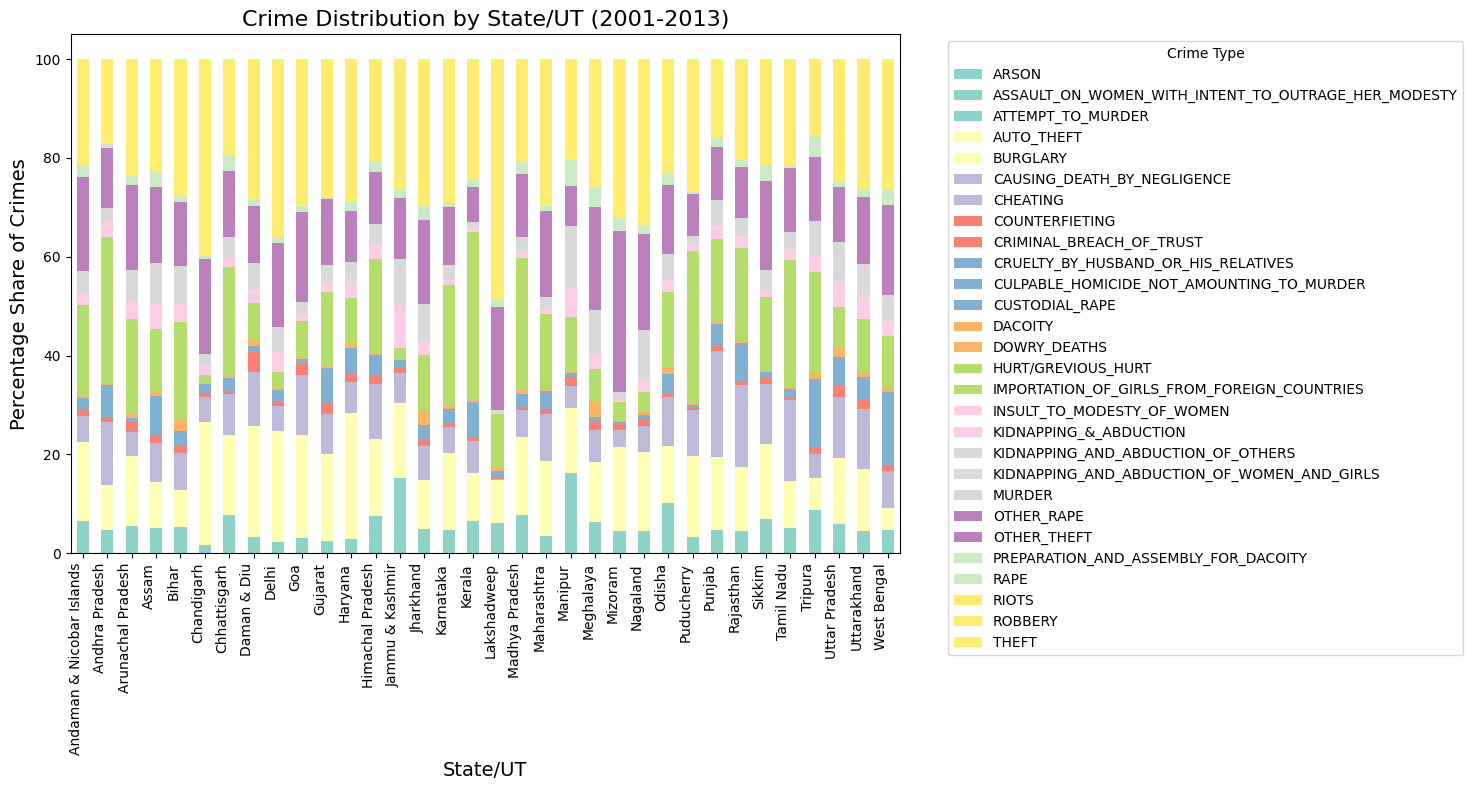

In [346]:
# Plotting the crime distribution using stacked bar chart
ax = crime_distribution.plot(kind='bar', stacked=True, colormap='Set3', figsize=(15, 8))
plt.title('Crime Distribution by State/UT (2001-2013)', fontsize=16)
plt.xlabel('State/UT', fontsize=14)
plt.ylabel('Percentage Share of Crimes', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Crime Type', loc='upper left', bbox_to_anchor=(1.05, 1))  # Legend positioned outside
plt.tight_layout()
plt.show()

### 🔍 Observation:

- The stacked bar chart represents the crime distribution across various States and UTs. Each bar represents the percentage share of different crime types within a state, with colors representing individual crimes.

- Prevalence of Specific Crimes:

    - **Theft** appears to be one of the **most prevalent crimes** in most states, as seen in the yellow portion of the bars, which dominates the majority of the states/UTs.

    - **Rape** and **Murder** are also noticeable in many states, with substantial portions of the bars being colored accordingly, especially in states like Delhi, Haryana, and Uttar Pradesh.

- Regional Variations:

    - Some states, such as **Goa** and **Lakshadweep**, show a more **even distribution of crime types**, suggesting that a wide variety of crimes are being reported across these regions.

    - On the other hand, certain states like **Chandigarh** and **Delhi** exhibit a **larger proportion of crimes in specific categories (like Theft and Rape)**, indicating that these states have a more concentrated crime problem in certain areas.

- States with Higher Crime Share:

    - States like **Delhi**, **Goa**, **Uttar Pradesh**, and **Tamil Nadu** have a significant share of **Theft** and **Assault** on Women with Intent to Outrage Her Modesty, suggesting a higher incidence of these crimes.

    - **Haryana** and **Madhya Pradesh** have a noticeable share of **Dowry Deaths** and **Cruelty by Husband or His Relatives**, indicating significant gender-based violence.

- This chart can be useful to identify patterns and trends in the crime distribution, and it highlights areas where certain crimes are more prevalent, helping policymakers and law enforcement agencies target interventions effectively.

---